In [ ]:
import argparse

import pickle
import time

import math
import os

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib as mpl

from IPython.display import display, clear_output, Latex

import copy


from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout,VBox
import ipywidgets as widgets

import itertools
import sympy as sp

In [ ]:
%matplotlib inline

In [ ]:
# %matplotlib ipympl

In [ ]:
# pip install ipympl

In [ ]:
b = 5
num_middle_node = 0
dumbbell_type = 'biased'

x, y = sp.symbols("x y")

cd_min = 1  ## the smallest cardinality to start with

In [ ]:
def nodes_pos_polygon(b, d=None, offset=[0,0], start_node=0, last_radian=0):
    """d is radius of the circle the polygon nodes in"""
    if d == None:
        d = b
    pos = dict()
    for i in range(0, b):
        pos[i+start_node] =  (round(offset[0]+d * np.cos((i+1)/b*2*np.pi + last_radian),8), 
                  round(offset[1]+d * np.sin((i+1)/b*2*np.pi + last_radian),8))
    # print('polygon pos', pos)
    return pos

def nodes_pos_connecting(b, d=None, offset=[0,0], num_middle_node=0, start_node=None, start_pos=None):
    """d is radius of the circle the polygon nodes in"""
    if num_middle_node==0 or num_middle_node==-1:
        return
    if d == None:
        d = b
    pos = dict()
    if start_node == None:
        start_node=b
    for i in range(0, num_middle_node):
        pos[i+start_node] = (offset[0]+ d * (i+2), offset[1])
    return pos

In [ ]:
# pos = nodes_pos_polygon(b, offset=[4,0])
# print(pos)

In [ ]:
def edges_clique(b, start_node=0):
    e_list = []
    for i in range(start_node, b+start_node):
        for j in range(i+1, b+start_node):
            e_list.append((i, j, dict(weight = 1)))
    return e_list

def edges_polygon(b, start_node=0):
    e_list = []
    for i in range(start_node, b+start_node):
        e_list.append((i, i+1 - b*((i+1)//(b+start_node)), dict(weight = 1)))
        # print(i, e_list)
    return e_list

def edges_connecting(b, start_node=None, num_middle_node=0):
    if num_middle_node==-1:
        return []
    if start_node==None:
        start_node=b
    e_list = []
    for i in range(0, num_middle_node+1):
        e_list.append((start_node + i - 1, start_node + i, dict(weight = 1)))
        # print('edge_connecting', e_list)
    return e_list

In [ ]:
# e_list = edges_clique(b)
# print(e_list)

In [ ]:
# G = nx.Graph()
# G.add_edges_from(e_list)
# for i, j in nodes_pos_polygon(b).items():
#     G.nodes[i]['pos'] = j
# nx.draw(G, pos=G.nodes(data='pos'))

In [ ]:
def nodes_pos_dumbbell(b, d=2, num_middle_node=0):
    if num_middle_node==-1:
        return  {**nodes_pos_polygon(b, d=d), **nodes_pos_polygon(b, d=d, offset=[2*d,0],
                                start_node=b-1, last_radian=np.pi-2*np.pi/b)}
    elif num_middle_node==0:
        return  {**nodes_pos_polygon(b, d=d), **nodes_pos_polygon(b, d=d, offset=[3*d,0],
                                start_node=b, last_radian=np.pi-2*np.pi/b)}
    else:  
        return {**nodes_pos_polygon(b, d=d), **nodes_pos_connecting(b, d=d, num_middle_node=num_middle_node),
            **nodes_pos_polygon(b, d=d, offset=[d*(num_middle_node+3),0],
                                start_node=b+num_middle_node, last_radian=np.pi-2*np.pi/b)}

In [ ]:
def edges_dumbbell(b, num_middle_node=0, dumbbell_type='normal'):
    if dumbbell_type=='normal' or dumbbell_type=='broken':
        return edges_clique(b) + edges_connecting(b, num_middle_node=num_middle_node) + edges_clique(
            b, start_node=b+num_middle_node)
    elif dumbbell_type=="biased":
        return edges_clique(b) + edges_connecting(b, num_middle_node=num_middle_node) + edges_polygon(
            b, start_node=b+num_middle_node)

In [ ]:
def create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type):
    if dumbbell_type=='normal' or dumbbell_type=='broken' or dumbbell_type=='biased':
        e_list = edges_dumbbell(b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)    

        
    # e_list.append((b-1, b, {'weight': 1}))
    n_pos_dict = nodes_pos_dumbbell(b, num_middle_node=num_middle_node)
    G = nx.Graph()
    G.add_edges_from(e_list)
    # print(e_list, G.nodes(), print(n_pos_dict))
    for i, j in n_pos_dict.items():
        G.nodes[i]['pos'] = j
    if dumbbell_type=='broken':
        G.remove_edge(b+num_middle_node+1, 2*b+num_middle_node-1)
    return G

In [ ]:
def plot_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type):
    g=create_dumbbell(b,num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
    # print(g.nodes(data=True))
    # print(g.edges(data=True))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500)
    nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke')
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2)
    # nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=labels)

    ax.set_aspect(1)
    plt.show()
    return g

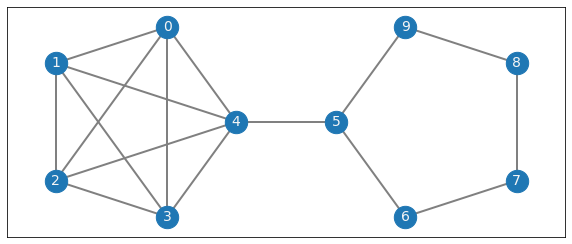

In [ ]:
# plot_dumbbell(b=b_global, num_middle_node=num_middle_node_global, dumbbell_type=dumbbell_type_global)
plot_dumbbell()

In [ ]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# import matplotlib.pyplot as plt
# %matplotlib inline

# import numpy as np

widget_plot_dumbbell=interactive(plot_dumbbell, b = widgets.IntSlider(value=4, min=3, max=15, step=1),
         num_middle_node=widgets.IntSlider(value=0, min=-1, max=5, step=1, description='number of node in-between'), 
         dumbbell_type=widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')],
                                                value='normal',
                                                description='dumbell type'))
display(widget_plot_dumbbell)

interactive(children=(IntSlider(value=4, description='b', max=15, min=3), IntSlider(value=0, description='numb…

In [ ]:
# def initialize_variables(g, cd_min):
def initialize_variables(g, cd_min):  # keep initialize_variables to be used separately
    # g can be obtained by g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)


    cd_solutions = {}  # cd means cardinality
    cd_criticals_sp = {}
    
    def total_internal_edges(g, nbunch):
        """nbunch: frosenset, set or list"""
        return sum([w for _,_,w in list(g.subgraph(nbunch).edges.data('weight'))])
    
    if cd_min >= 0:
        cd_min_set = set(itertools.combinations(g.nodes(), cd_min))
        community_1_intercept = max([total_internal_edges(g, c) for c in cd_min_set])
        community_1_set = {frozenset(c) for c in cd_min_set if total_internal_edges(g, c)==community_1_intercept}
        cd_solutions[cd_min] = cd_solutions.get(cd_min, set()).union(community_1_set)

    cd_solutions[len(g.nodes())] = {frozenset(g.nodes)}
    cd_criticals_sp[len(g.nodes())] = 0

    
    
    ## for each cardinality, find the best sets
    def find_candidate_for_cd(g):
        cd_intercept_dict = {}
        cd_candidate_community_dict = {}
        for cd in range(cd_min, len(g.nodes())+1):
            temp_intercept = -np.inf
            for c in set(itertools.combinations(g.nodes(), cd)):
                c_intercept =  total_internal_edges(g, c)
                if c_intercept > temp_intercept:
                    cd_candidate_community_dict.setdefault(cd, set()).clear()
                    temp_intercept = c_intercept
                    cd_intercept_dict[cd] = c_intercept
                    cd_candidate_community_dict.setdefault(cd, set()).add(frozenset(c))
                if c_intercept == temp_intercept:
                    cd_candidate_community_dict.setdefault(cd, set()).add(frozenset(c))
        return cd_intercept_dict, cd_candidate_community_dict
    cd_intercept_dict, cd_candidate_community_dict = find_candidate_for_cd(g)    


    f_sp = {}     ## the functions for the candidates sets of each cardinality
    # cd_y_intercept_sp = {}
    for cd in range(cd_min, len(g.nodes())+1):
        f_sp.setdefault(cd, - cd * x + cd_intercept_dict[cd])
    # f_sp

    info_plot = {} ## store the information for plotting
    # new_run = True

    community_1 = list(cd_solutions[cd_min])[0]
    community_2 = list(cd_solutions[len(g.nodes())])[0]    
    
    return cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, community_1, community_2

# cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, community_1, community_2 = initialize_variables(g)

In [ ]:
# print(cd_intercept_dict)
# cd_candidate_community_dict
# cd_candidate_community_list = sorted(list(cd_candidate_community_dict.items()), reverse=True)

In [ ]:
# print(cd_candidate_community_list)

In [ ]:
# print(cd_intercept_dict)

In [ ]:
# def find_critical(g, community_1=community_1, community_2=community_2, 
#                   cd_solutions = cd_solutions, cd_criticals_sp=cd_criticals_sp, new_run_reset = True):
def find_critical(g=None, cd_min=cd_min):
    # be careful when passing a list or a set to arguments
    # global new_run, info_plot
    # if new_run == True:
    #     info_plot = {}

    if g==None:
        raise Exception('g should be provided and can be obtained by g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)')

    
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, community_1, community_2 = initialize_variables(g, cd_min)
    
    # def _find_critical(g, community_1=None, community_2=None, cd_solutions=None, cd_criticals_sp=None, 
    #                    f_sp=None, info_plot=None,cd_intercept_dict=None, cd_candidate_community_dict=None):
    def _find_critical(g, community_1=None, community_2=None):
        # community_1 = list(cd_solutions[cd_min])[0]
        # community_2 = list(cd_solutions[len(g.nodes())])[0]

        # global info_plot
        # print(info_plot)

        current_call_index = len(info_plot)
        info_plot[current_call_index] = {0:[community_1,community_2]}

        cd1 = len(community_1)
        cd2 = len(community_2)

        # f_sp[cd1] = - cd1 * x + total_internal_edges(g, community_1)
        # f_sp[cd2] = - cd2 * x + total_internal_edges(g, community_2)

        cross_sp = sp.linsolve([f_sp[cd1] - y, f_sp[cd2] - y], (x, y))
        cross_x_sp, cross_y_sp = list(list(cross_sp)[0])
        # print(cd1, cd2, cross_x_sp)

        info_plot[current_call_index][1] = [cross_x_sp, cross_y_sp]

        temp_best_cd = cd1
        temp_non_minimal_cd_set = set()
        temp_best_y_sp = cross_y_sp
        for cd in range(cd2-1, cd1-1, -1):  # from large cardinality to small cardinality
            cd_y_sp = f_sp[cd].subs(x, cross_x_sp)
            # cd1 should be computed, otherwise will cause additional non-usefull recursion when multiple line intersect together. then should be careful not to introduce solutions for cd1 into non minimal solution set
            if cd_y_sp == temp_best_y_sp: # 
                temp_best_y_sp = cd_y_sp
                temp_best_cd = cd
                if cd != cd1:
                    temp_non_minimal_cd_set.add(cd)

            if cd_y_sp > temp_best_y_sp:
                temp_best_y_sp = cd_y_sp
                temp_best_cd = cd
                temp_non_minimal_cd_set.clear()
                # print(len(info_plot),cd, cd_y_sp, temp_best_y_sp)

        info_plot[current_call_index][2] = [False, False] # first len(temp_non_minimal_cd_set)==0, second for temp_best==cd1 
        info_plot[current_call_index][3] = [set(), set()]

        if len(temp_non_minimal_cd_set)!=0:
            for temp_cd in temp_non_minimal_cd_set:
                cd_solutions[temp_cd]=cd_solutions.setdefault(temp_cd, set()).union(cd_candidate_community_dict[temp_cd])

            info_plot[current_call_index][2][0] = True
            info_plot[current_call_index][3][0] = temp_non_minimal_cd_set

        if temp_best_cd == cd1:
            cd_solutions[cd1]=cd_solutions.setdefault(cd1, set()).union(cd_candidate_community_dict[cd1])
            cd_criticals_sp[cd1] = cross_x_sp
            # print(cross_x_sp,cd_criticals_sp)

            info_plot[current_call_index][2][1] = True        
            return
        else:
            cd_solutions[temp_best_cd]=cd_solutions.setdefault(temp_best_cd, set()).union(cd_candidate_community_dict[temp_best_cd])

            info_plot[current_call_index][2][1] = False
            info_plot[current_call_index][3][1] = temp_best_cd           

            # print(temp_best_cd, cd_solutions)
            community = list(cd_solutions[temp_best_cd])[0]
            # print('temp_best_cd', temp_best_cd, community)
            _find_critical(g, community_1, community)
            _find_critical(g, community, community_2)    
    
    
    # _find_critical(g, community_1=community_1, community_2=community_2, 
    #               cd_solutions = cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict)

    # if new_run_reset == True:
    #     new_run = True
    # return cd_solutions, cd_criticals_sp, info_plot    
    
    _find_critical(g, community_1=community_1, community_2=community_2)
    return cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict

In [ ]:
g = create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

In [ ]:
cd_solutions

{1: {frozenset({9}),
  frozenset({1}),
  frozenset({5}),
  frozenset({4}),
  frozenset({2}),
  frozenset({8}),
  frozenset({7}),
  frozenset({3}),
  frozenset({6}),
  frozenset({0})},
 10: {frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})},
 5: {frozenset({0, 1, 2, 3, 4})}}

In [ ]:
cd_criticals_sp

{10: 0, 1: 5/2, 5: 6/5}

In [ ]:
cd_criticals_sp_list = sorted(list(cd_criticals_sp.items()))
print(cd_criticals_sp_list)

[(1, 5/2), (5, 6/5), (10, 0)]


In [ ]:
# info_plot

In [ ]:
## Solve the autowrapping problem in jupyter notebook by using ax.add_artist()
## https://stackoverflow.com/a/56552098
# import matplotlib.pyplot as plt
# import matplotlib.text as mtext

class WrapText(mtext.Text):
    def __init__(self,
                 x=0, y=0, text='',
                 width=0,
                 **kwargs):
        mtext.Text.__init__(self,
                 x=x, y=y, text=text,
                 wrap=True,
                 **kwargs)
        self.width = width  # in screen pixels. You could do scaling first

    def _get_wrap_line_width(self):
        return self.width

# fig = plt.figure(1, clear=True)
# ax = fig.add_subplot(111)

# text = ('Lorem ipsum dolor sit amet, consectetur adipiscing elit, '
#         'sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. ')

# # Create artist object. Note clip_on is True by default
# # The axes doesn't have this method, so the object is created separately
# # and added afterwards.
# wtxt = WrapText(.8, .4, text, width=200, va='top', clip_on=False,
#                 bbox=dict(boxstyle='square', fc='w', ec='b'))
# # Add artist to the axes
# ax.add_artist(wtxt)

# plt.show()

In [ ]:
# %matplotlib inline
# from IPython.display import display, clear_output, Latex

# import numpy as np
# import matplotlib.pyplot as plt 
# import matplotlib as mpl
# import time
class CusPlotSetting:    
    cmap_basic = mpl.colors.ListedColormap(['orangered','blue', 'purple', 'green','red','magenta', 'blueviolet','yellowgreen', 'deeppink', 'cyan'])
    cmap = mpl.colors.ListedColormap(cmap_basic.colors * max(100, (len(g.nodes())//len(cmap_basic.colors)+1)))  ## this is based on b, better not to use
    # cmap = plt.get_cmap('Paired')

    # def _plot_step(ax, x, y, **kwargs):
    #     ax.plot(x, y, **kwargs)
    #     # plt.show()
    #     return ax

    figsize_x=16
    figsize_y=12
    font_size = 12

    fig_aspect=0.5
    fig_xlim_left=0
    fig_xlim_right=8
    fig_ylim_bottom=-18
    fig_ylim_top=13

    text_x_pos = 3.5
    linewidth_1 = 0.3
    linewidth_2 = 3
    scatter_size_1 = 10
    scatter_size_2 = 80

    zorder_1 = len(info_plot)
    zorder_2 = 10*len(info_plot)

    d_offset = abs(f_sp[cd_min].evalf(subs={x:max(cd_criticals_sp.values())})) #offset for text position based on the distance from first critical point to x axis

    xx_right=8
# xx=np.linspace(0,xx_right)

def plot_steps(step_pause = len(info_plot)*4, 
               g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=CusPlotSetting.text_x_pos, linewidth_1 = CusPlotSetting.linewidth_1, 
                   linewidth_2 = CusPlotSetting.linewidth_2, scatter_size_1 = CusPlotSetting.scatter_size_1, scatter_size_2 = CusPlotSetting.scatter_size_2, 
                   zorder_1=CusPlotSetting.zorder_1,zorder_2=CusPlotSetting.zorder_2, d_offset=CusPlotSetting.d_offset,
                   figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect,
                   fig_xlim_left=CusPlotSetting.fig_xlim_left, fig_xlim_right=CusPlotSetting.fig_xlim_right, 
                   fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, 
                   xx_right=CusPlotSetting.xx_right, cmap_basic=CusPlotSetting.cmap_basic):
    ## ipython interact widget can't accept function with arguments with type tuple.
    
    cmap = mpl.colors.ListedColormap(cmap_basic.colors * (len(g.nodes())//len(cmap_basic.colors)+2))
    
    xx=np.linspace(0, xx_right)
    fig = plt.figure(figsize=(figsize_x, figsize_y))

    ax = fig.add_subplot(121)
    plt.rc('font', size=font_size) 

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data',0))

    ax.set_aspect(fig_aspect)
    ax.set_xlim(fig_xlim_left, fig_xlim_right)
    ax.set_ylim(fig_ylim_bottom, fig_ylim_top)
    ax.xaxis.get_major_ticks()[0].label1.set_visible(False)  # https://stackoverflow.com/a/13583251
    
    
    ax2 = fig.add_subplot(122)
    pos=g.nodes('pos')
    nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500, ax=ax2)
    nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke',ax=ax2)
    nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2, ax=ax2)
    ax2.set_aspect(1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    print('If there are multiple solutions, a random solution is indicated on the right hand side. Additionally, non-minimal solutions are not shown by text.')
    
    
    step_current = 0

    for big_step in range(0, len(info_plot)):
        info = info_plot[big_step]
        cd1, cd2 = len(info[0][0]), len(info[0][1])
        yy1 = - cd1 * xx + cd_intercept_dict[cd1]
        yy2 = - cd2 * xx + cd_intercept_dict[cd2]
        
        
        if step_pause==0: break ## 


        f2_str = 'y='+str(f_sp[cd2])
        ax.plot(xx, yy2, label=f2_str, color=cmap.colors[cd2], linewidth=linewidth_1)
        ax.text(text_x_pos, f_sp[cd2].evalf(subs={x:text_x_pos}) +0.1, f2_str, color=cmap.colors[cd2])

        f1_str = 'y='+str(f_sp[cd1])
        ax.plot(xx, yy1, label='y='+str(f_sp[cd1]), color=cmap.colors[cd1], linewidth=linewidth_1)
        ax.text(text_x_pos, f_sp[cd1].evalf(subs={x:text_x_pos}) +0.1, f1_str, color=cmap.colors[cd1])
        # kwargs = {'label':'f(x)='+str(f_sp[cd1])}
        # ax = _plot_step(ax, xx, yy1, **kwargs)
        # plt.show()
        # time.sleep(2)
        
        step_current += 1
        if step_current >= step_pause: break

        ax.scatter(*info[1], s=scatter_size_1, c=cmap.colors[cd1])
        
        step_current += 1
        if step_current >= step_pause: break

        
        if info[2][0] == True:
            for cdprime in info[3][0]:
                yyprime = - cdprime * xx + cd_intercept_dict[cdprime]
                ax.plot(xx, yyprime, label='y='+str(f_sp[cdprime]), color=cmap.colors[cdprime], linewidth=linewidth_1)
                # if wanted, can add text for the solutions.
        
            step_current += 1
            if step_current >= step_pause: break


        if info[2][1] == True:
            ax.scatter(*info[1], s=scatter_size_2, c=cmap.colors[cd1], zorder=zorder_2)
            

        
            step_current += 1
            if step_current >= step_pause: break


            
            # if d_offset==None: This is restricted to recursion from small community to large community
            #     d_offset = (0 if info[1][1]>0 else - info[1][1])
            #     # print(d_offset)
            point_text = [info[1][0],  info[1][1] + d_offset + 3]
            ax.plot([info[1][0], point_text[0]], [info[1][1], point_text[1]], color=cmap.colors[cd1], ls='dashed', linewidth=linewidth_2)

            cd1_solution_text = ', '.join(str(set(s)) for s in cd_solutions[cd1]) if cd1!=0 else str(r'$\emptyset$')
            text = str('x=') + str(info[1][0]) + str(': ') + str(cd1_solution_text)
            wtxt = WrapText(point_text[0]+0.3,point_text[1], text, color=cmap.colors[cd1], width=200, va='top', clip_on=True,
                    bbox=dict(boxstyle='square', fc='w', ec=cmap.colors[cd1], lw=0))
            ax.add_artist(wtxt)

            if big_step > 0:
                if cd1 != len(info_plot[big_step-1][0][0]):
                    cross_x_cd1_with_last_cd1 = float(list(list(
                        sp.linsolve([f_sp[cd1] - y, f_sp[len(info_plot[big_step-1][0][0])] - y], (x,y)))[0])[0])
                else:
                    cross_x_cd1_with_last_cd1 = np.inf
            if big_step == 0:
                cross_x_cd1_with_last_cd1 = np.inf
            # here can be better, want to decide the boundary for current cd1 curve to be a solution, and 
            # currently in the recursion, we always calculate from smaller community_1, hence can take it from 
            # the interception of community_1 with that in last call of the recursion.
            # if the community_1 in the last call is the most smallest cardinality, current community_1 will be the same, so can't get an intersection soution

            xx_cd1=np.linspace(float(info[1][0]), min(max(xx), cross_x_cd1_with_last_cd1))
            yy_cd1=- cd1 * xx_cd1 + cd_intercept_dict[cd1]
            ax.plot(xx_cd1, yy_cd1, color=cmap.colors[cd1], linewidth=linewidth_2)
            
            
            nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500, ax=ax2)
            nx.draw_networkx_nodes(list(cd_solutions[cd1])[0], pos=g.nodes(data='pos'), node_color=cmap.colors[cd1], node_size=500, ax=ax2)
            
            nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke',ax=ax2)
            nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2, ax=ax2)
            # ax2.add_text(0.5*ax2.bbox.width, 0.2*ax2.bbox.height, str('If there are multiple solutions, a random solution is indicated on the right hand side.'), color=cmap.colors[cd1])

            
            
            

            if cd2 == len(info_plot[0][0][1]): # the end must be the one related with the line for V
                
                step_current += 1
                if step_current >= step_pause: break
                
                xx_cd2=np.linspace(0, float(info[1][0]))
                yy_cd2=- cd2 * xx_cd2 + cd_intercept_dict[cd2]
                ax.plot(xx_cd2, yy_cd2, color=cmap.colors[cd2], linewidth=linewidth_2)
                ax.text(0+0.5, cd_intercept_dict[cd2] -0.25*cd2, str(set(list(cd_solutions[cd2])[0])), color=cmap.colors[cd2])              
            
                nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500, ax=ax2)
                nx.draw_networkx_nodes(list(cd_solutions[cd2])[0], pos=g.nodes(data='pos'), node_color=cmap.colors[cd2], node_size=500, ax=ax2)
                nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke',ax=ax2)
                nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2, ax=ax2)
                


    # ax2 = fig.add_subplot(122)
    # ax2.axis([0,10,0,10])
    # ax2_str = str(cd_criticals_sp_list) + str(cd_solutions)
    # ## https://stackoverflow.com/a/15740730
    # from textwrap import wrap
    # # ax2_str_wrapped = [ '\n'.join(wrap(l, 20)) for l in ax2_str ]
    # # ax2_text = ax2.text(2, 10, ax2_str, color=cmap.colors[cd2], ha='left', wrap=True )    
    # # ## https://stackoverflow.com/a/56552098
    # # ax2_text._get_wrap_line_width = lambda : 600.
    # ax2.spines['right'].set_visible(False)
    # ax2.spines['top'].set_visible(False)
    # ax2.spines['bottom'].set_visible(False)
    # ax2.spines['left'].set_visible(False)
    # ax2.set_xticks([])
    # ax2.set_yticks([])

    # for i, slope in enumerate(slope_list):
    #     slope_in_label = '' if slope_list[i] == 1 else str(slope_list[i])
    #     if intercept_list[i]>0:
    #         intercept_in_label = ' + ' + str(intercept_list[i])
    #     elif intercept_list[i]<0:
    #         intercept_in_label = ' - ' + str(-intercept_list[i])
    #     else:
    #         intercept_in_label = ''
    #     locals()['y_'+str(slope)] = slope_in_label + 'x' + intercept_in_label
    #     y=slope * x + intercept_list[i]
    #     plt.plot(x, y, label='y=' + locals()['y_'+str(slope)])
    # plt.legend()
    plt.show()

In [ ]:
def total_steps_by_info_plot(info_plot=None): # should according to plot_steps()
    if info_plot==None:
        raise Exception('The variable info_plot is None!')
    steps_total=0
    for big_step in range(0, len(info_plot)):
        steps_total += info_plot[big_step][2][0] + info_plot[big_step][2][1]
    steps_total += 2*len(info_plot)+1+1
    return steps_total
# but interact widget do not when info_plot changed due to the change of b, this value can't be updated automaticly. Hence should need another widget to help, or create a global variable or store in a class.

In [ ]:
def plot_steps_with_important_parameter(step_pause, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):
    plot_steps(step_pause, text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

widget_plot_steps_with_important_parameter = interactive(plot_steps_with_important_parameter, step_pause=widgets.IntSlider(value=3, min=0, max=len(info_plot)*4, step=1, description='Steps'))
controls = HBox(widget_plot_steps_with_important_parameter.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget_plot_steps_with_important_parameter.children[-1]
display(VBox([controls, output]))

In [ ]:
def plot_steps_with_b(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):
    g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
# widget_plot_steps_with_b = interactive(plot_steps_with_b, b=widgets.IntSlider(value=4, min=3, max=8, step=1, description='b'),
#                                        num_middle_node=widgets.IntSlider(value=0, min=-1, max=6, step=1, description='Node in-between'), 
#                                        dumbbell_type=widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')],
#                                                 value='normal',
#                                                 description='dumbell type'),
#                                        cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
#                                        step_pause=widgets.IntSlider(value=3, min=0, max=12*b, step=1, description='Steps'))
# controls = HBox(widget_plot_steps_with_b.children[:-1], layout = Layout(flex_flow='row wrap'))
# output = widget_plot_steps_with_b.children[-1]
# display(VBox([controls, output]))

In [ ]:
# widget_b = widgets.IntSlider(value=4, min=3, max=8, step=1, description='b')
# widget_num_middle_node = widgets.IntSlider(value=0, min=-1, max=6, step=1, description='Node in-between')
# widget_cd_min = widgets.IntSlider(value=1, min=0, max=5, step=1, description='k')
# widget_dumbbell_type = widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')], value='normal', description='dumbell type')
# widget_step_pause = widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')) # default max depends on the other default value

# def update_widget_step_pause(*args):
#     _, _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_num_middle_node.value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
#     widget_step_pause.max = total_steps_by_info_plot(info_plot=info_plot)

# widget_b.observe(update_widget_step_pause, 'value')
# widget_num_middle_node.observe(update_widget_step_pause, 'value')
# widget_cd_min.observe(update_widget_step_pause, 'value')
# widget_dumbbell_type.observe(update_widget_step_pause, 'value')



widget_plot_steps_with_b = interactive(plot_steps_with_b, b=widgets.IntSlider(value=4, min=3, max=8, step=1, description='b'),
                                       num_middle_node=widgets.IntSlider(value=0, min=-1, max=6, step=1, description='Node in-between', style={'description_width': 'initial'}), 
                                       dumbbell_type=widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')], value='normal', description='dumbell type'),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                       step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))
# output_observe = widgets.Output()
def update_widget_plot_steps_with_b(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_plot_steps_with_b.children[0].value, num_middle_node=widget_plot_steps_with_b.children[1].value, 
                                                             dumbbell_type=widget_plot_steps_with_b.children[2].value), widget_plot_steps_with_b.children[3].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_b.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_b.children[4].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_b.children[1].observe(update_widget_plot_steps_with_b, 'value')

for child in widget_plot_steps_with_b.children[0:4]:
    child.observe(update_widget_plot_steps_with_b, 'value')


widget_plot_steps_with_b_controls = HBox(widget_plot_steps_with_b.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_b_output = widget_plot_steps_with_b.children[-1]
# display(VBox([widget_plot_steps_with_b_controls, widget_plot_steps_with_b_output]))

In [ ]:
display(VBox([widget_plot_steps_with_b_controls, widget_plot_steps_with_b_output]))
# display(output_observe)

In [ ]:
# g= create_dumbbell(b=4, num_middle_node=2, dumbbell_type='normal')
# cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g,1)
# print(cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, sep='\n\n')

In [ ]:
# g.edges(data=True)

In [ ]:
# info_plot

In [ ]:
widget_plot_steps_with_b.children[0:4]

(IntSlider(value=4, description='b', max=8, min=3),
 IntSlider(value=0, description='Node in-between', max=6, min=-1, style=SliderStyle(description_width='initial')),
 Dropdown(description='dumbell type', options=(('normal', 'normal'), ('biased', 'biased'), ('broken', 'broken')), value='normal'),
 IntSlider(value=1, description='k', max=5))

In [ ]:
widget_plot_steps_with_b.children[1].value

0

In [ ]:
_, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type))

In [ ]:
i = {0: {0: [frozenset({2}), frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14})], 1: [3/2, -3/2], 2: [False, False], 3: [set(), 5]}, 1: {0: [frozenset({2}), frozenset({0, 1, 2, 3, 4})], 1: [5/2, -5/2], 2: [False, True], 3: [set(), set()]}, 2: {0: [frozenset({0, 1, 2, 3, 4}), frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14})], 1: [11/10, 9/2], 2: [False, True], 3: [set(), set()]}}

In [ ]:
total_steps_by_info_plot(i)

10

In [ ]:
def create_overlapping(s_1, e_1, s_2, e_2, e_del=None, pos_seed=1):
    '''
    s1 e1: the start and end index for the first clique;
    s2 e2: the start and end index for the second clique;
    the index between s1 and e2 are the overlapping nodes.
    e_del: the list/tuple/set of edges that to be deleted, i.e., e_del=[(0,1),(1,2)], if d_del is provided as str, it will be coverted.
    '''
    e_list = []
    for i in range(s_1, e_1+1):
        for j in range(i+1,e_1+1):
            e_list.append((i, j, dict(weight = 1)))
    for i in range(s_2, e_2+1):
        for j in range(i+1, e_2+1):
            if j>=max(e_1+1,i+1):
                e_list.append((i, j, dict(weight = 1)))
    G = nx.Graph()
    G.add_edges_from(e_list)
    
    def str_tuple_to_int_tuple(s_t): # coverting e_del to list of tuples of integers/index of edges if e_del is str
        i_t = tuple(map(int, s_t.replace('(','').replace(')','').replace('[','').replace(']','').split(',')))
        return i_t
        
    if e_del != None and e_del != '': # ipywideget will give '' by default instead of None
        if type(e_del == str):
            e_del = list(map(str_tuple_to_int_tuple, e_del.replace(' ','').split('),(')))
        G.remove_edges_from(tuple(e_del))
    
    # G.remove_edges_from(([0,1],[2,3]))
    
    pos = nx.spring_layout(G, seed=pos_seed)
    n_pos_dict = pos
    for i, j in n_pos_dict.items():
        G.nodes[i]['pos'] = j
    return G

def plot_overlapping(s_1,e_1,s_2,e_2, pos_seed=1, *args):
    g=create_overlapping(s_1,e_1,s_2,e_2, pos_seed=pos_seed)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2)
    ax.set_aspect(1)
    plt.show()
    return g

In [ ]:
def plot_steps_with_overlapping(s_1=0,e_1=4, s_2=3, e_2=7, e_del=None, pos_seed=1, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):
    # g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
    g=create_overlapping(s_1,e_1,s_2,e_2, e_del=e_del, pos_seed=pos_seed)
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
# plot_steps_with_overlapping()

In [ ]:
widget_plot_steps_with_overlapping = interactive(plot_steps_with_overlapping, s_1=widgets.IntSlider(value=0, min=0, max=1, step=1, description='start node of 1st subgraph'),
                                       e_1=widgets.IntSlider(value=4, min=1, max=12, step=1, description='end node of 1st subgraph', style={'description_width': 'initial'}), 
                                       s_2=widgets.IntSlider(value=3, min=1, max=8, step=1, description='start node of 2nd subgraph'),
                                       e_2=widgets.IntSlider(value=7, min=2, max=20, step=1, description='end node of 2nd subgraph', style={'description_width': 'initial'}), 
                                       e_del=widgets.Textarea(value='', placeholder='format: [(1,2),(3,4)]', description='edges to delete', disabled=False, layout=Layout(width='50%')),
                                       pos_seed=widgets.IntSlider(value=1, min=1, max=50, step=1, description='pos_seed', style={'description_width': 'initial'}),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                                 step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))
# output_observe = widgets.Output()
def update_widget_plot_steps_with_overlapping(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(create_overlapping(s_1=widget_plot_steps_with_overlapping.children[0].value, e_1=widget_plot_steps_with_overlapping.children[1].value, 
                                                             s_2=widget_plot_steps_with_overlapping.children[2].value, e_2=widget_plot_steps_with_overlapping.children[3].value), 
                                             widget_plot_steps_with_overlapping.children[6].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_overlapping.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_overlapping.children[7].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_overlapping.children[1].observe(update_widget_plot_steps_with_overlapping, 'value')

for child in widget_plot_steps_with_overlapping.children[0:4]:
    child.observe(update_widget_plot_steps_with_overlapping, 'value')


widget_plot_steps_with_overlapping_controls = HBox(widget_plot_steps_with_overlapping.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_overlapping_output = widget_plot_steps_with_overlapping.children[-1]

In [ ]:
display(VBox([widget_plot_steps_with_overlapping_controls, widget_plot_steps_with_overlapping_output]))

In [ ]:
# the following e cells use naive method for customized graph. can skip and use the more general one after 5 cells
print('the following e cells use naive method for customized graph. can skip and use the more general one with ipywidget after 5 cells')

the following e cells use naive method for customized graph. can skip and use the more general one with ipywidget after 5 cells


In [ ]:
cus_g = nx.Graph()
cus_g.add_edges_from([(0,1),
                      (1,2),
                      (2,3),
                     (0,2)])

for e in cus_g.edges():
    if not 'weight' in cus_g.edges[e]:
        cus_g.edges[e]['weight'] = 1

pos_seed = 0
pos = nx.spring_layout(cus_g, seed=pos_seed)
n_pos_dict = pos
for k, v in n_pos_dict.items():
    cus_g.nodes[k]['pos'] = v

In [ ]:
cus_g.nodes(data=True)
cus_g.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (1, 2, {'weight': 1}), (2, 3, {'weight': 1})])

In [ ]:
def plot_steps_with_cus_g(g=cus_g, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):

    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
widget_plot_steps_with_cus_g = interactive(plot_steps_with_cus_g, g=fixed(cus_g),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                                 step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))

# output_observe = widgets.Output()
def update_widget_plot_steps_with_cus_g(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(cus_g, widget_plot_steps_with_cus_g.children[0].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_overlapping.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_cus_g.children[1].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_overlapping.children[1].observe(update_widget_plot_steps_with_overlapping, 'value')

for child in widget_plot_steps_with_cus_g.children[0:0]:
    child.observe(update_widget_plot_steps_with_cus_g, 'value')


widget_plot_steps_with_cus_g_controls = HBox(widget_plot_steps_with_cus_g.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_cus_g_output = widget_plot_steps_with_cus_g.children[-1]

In [ ]:
display(VBox([widget_plot_steps_with_cus_g_controls, widget_plot_steps_with_cus_g_output]))

In [ ]:
def create_cus_g(e_add, e_weight_add=None, e_del=None):
    cus_g = nx.Graph()
    
    def str_tuple_to_int_tuple(s_t): # coverting e_del to list of tuples of integers/index of edges if e_del is str
        i_t = tuple(map(int, s_t.replace('(','').replace(')','').replace('[','').replace(']','').split(',')))
        return i_t
    
    if e_add != None and e_add != '': # ipywideget will give '' by default instead of None, and give str type when not ''
        if type(e_add) == str:
            e_add = list(map(str_tuple_to_int_tuple, e_add.replace(' ','').split('),(')))
        cus_g.add_edges_from(tuple(e_add))    
        
            
    for e in cus_g.edges():
        if not 'weight' in cus_g.edges[e]:
            cus_g.edges[e]['weight'] = 1
        
    if e_weight_add != None and e_weight_add != '' and type(e_weight_add)!=list: # ipywideget will give '' by default instead of None
        if type(e_weight_add) == str:
            e_weight_add = list(map(str_tuple_to_int_tuple, e_weight_add.replace(' ','').split('),(')))
        for i in range(len(e_weight_add)):
            e_current = tuple((e_weight_add[i][0], e_weight_add[i][1], {'weight':e_weight_add[i][2]}))
            if cus_g.has_edge(e_weight_add[i][0], e_weight_add[i][1]):
                cus_g.edges[e_weight_add[i][0], e_weight_add[i][1]]['weight'] = e_weight_add[i][2]
            else:
                cus_g.add_edges_from([e_current])
        #use add_weighted_edges_from is() easier
        
        
    if e_del != None and e_del != '' and type(e_del)!=list: # ipywideget will give '' by default instead of None
        if type(e_del) == str:
            e_del = list(map(str_tuple_to_int_tuple, e_del.replace(' ','').split('),(')))
        cus_g.remove_edges_from(tuple(e_del))


    pos_seed = 0
    pos = nx.spring_layout(cus_g, seed=pos_seed)
    n_pos_dict = pos
    for k, v in n_pos_dict.items():
        cus_g.nodes[k]['pos'] = v
        
    return cus_g

In [ ]:
def plot_steps_with_cus_g(e_add=None, e_weight_add=None, e_del=None, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):

    g=create_cus_g(e_add=e_add, e_weight_add=e_weight_add, e_del=e_del)
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
widget_plot_steps_with_cus_g = interactive(plot_steps_with_cus_g, 
                                           e_add=widgets.Textarea(value='[(0,1),(1,2),(0,2),(2,3)]', placeholder='format: [(1,2),(3,4)]', description='edges to add', disabled=False, layout=Layout(width='50%')),
                                           e_weight_add=widgets.Textarea(value='', placeholder='format: [(1,2,0.5),(3,4,2.5)], can be seen as passed to add_weighted_edges_from()', description='edges with weight', disabled=False, layout=Layout(width='50%')),
                                           e_del=widgets.Textarea(value='', placeholder='format: [(1,2),(3,4)]', description='edges to delete', disabled=False, layout=Layout(width='50%')),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                                 step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))

# output_observe = widgets.Output()
def update_widget_plot_steps_with_cus_g(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(create_cus_g(e_add=widget_plot_steps_with_cus_g.children[0].value, e_weight_add=widget_plot_steps_with_cus_g.children[1].value, e_del=widget_plot_steps_with_cus_g.children[2].value), widget_plot_steps_with_cus_g.children[3].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_overlapping.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_cus_g.children[4].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_overlapping.children[1].observe(update_widget_plot_steps_with_overlapping, 'value')

for child in widget_plot_steps_with_cus_g.children[0:3]:
    child.observe(update_widget_plot_steps_with_cus_g, 'value')


widget_plot_steps_with_cus_g_controls = HBox(widget_plot_steps_with_cus_g.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_cus_g_output = widget_plot_steps_with_cus_g.children[-1]

In [ ]:
display(VBox([widget_plot_steps_with_cus_g_controls, widget_plot_steps_with_cus_g_output]))

In [ ]:
cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

In [ ]:
cd_solutions

{1: {frozenset({9}),
  frozenset({1}),
  frozenset({5}),
  frozenset({4}),
  frozenset({2}),
  frozenset({8}),
  frozenset({7}),
  frozenset({3}),
  frozenset({6}),
  frozenset({0})},
 10: {frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})},
 5: {frozenset({0, 1, 2, 3, 4})}}

In [ ]:
cd_criticals_sp

{10: 0, 1: 5/2, 5: 6/5}

In [ ]:
cus_g = create_cus_g([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(4,5),(4,6),(4,7),(5,6),(5,7),(6,7),(6,8),(8,9),(8,11),(9,10),(9,11),(10,11)])
print(cus_g.nodes)
threshold_str = input('The critical value for partitioning:')
if '/' in threshold_str:
    cus_s=sp.Rational(int(threshold_str.split('/')[0]),int(threshold_str.split('/')[1]))
else:
    cus_s=float(threshold_str)
solutions_at_cus_s = []
critical_sp_at_cus_s = []

cus_g_temp = cus_g.copy()
while len(cus_g_temp) !=0:  # NoneType when all nodes are removed
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(cus_g_temp, cd_min)
    
    max_s = max(list(cd_criticals_sp.values()))
    
    for i, criticals_sp_i in  sorted(list(cd_criticals_sp.items()),reverse=True):
        if criticals_sp_i >= cus_s or criticals_sp_i == max_s:  # criticals_sp_i is the min value for sets in cd_solutions[i] to be maximal and have a strength>=criticals_sp_i
            critical_sp_at_cus_s.append(criticals_sp_i)
            solutions_at_cus_s.append(cd_solutions[i])
            print("turning point:", criticals_sp_i, ", clusters:", cd_solutions[i])
            
            cus_g_temp.remove_nodes_from(set().union(*[set(temp_set) for temp_set  in cd_solutions[i]]))

            break

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10]


The critical value for partitioning: 1


turning point: 3/2 , clusters: {frozenset({0, 1, 2, 3, 4, 5, 6, 7})}
turning point: 5/3 , clusters: {frozenset({11}), frozenset({9}), frozenset({8}), frozenset({10})}


In [ ]:
#attention: if g is a nx.Graph(), then g=g.remove_nodes_from()  will give NoneType, we shouldn't use such equation, we should only use g.remove_nodes_from() 

In [ ]:
threshold='5/3'
if '/' in threshold:
    sp.Rational(int(threshold.split('/')[0]),int(threshold.split('/')[1]))

In [ ]:
 # cd_solutions

In [ ]:
# cd_criticals_sp

In [ ]:
# sorted(list(cd_criticals_sp.items()),reverse=True)

In [ ]:
type(ag)

NameError: name 'ag' is not defined

In [ ]:


-----------------------------------------------EndEnd






-----------------------------------------------EndEnd






-----------------------------------------------EndEnd



In [ ]:
from IPython.display import display
import ipywidgets as widgets

int_range0_slider = widgets.IntSlider()
int_range1_slider = widgets.IntSlider()
output = widgets.Output()

def interactive_function(inp0,inp1):
    with output:
        print('ie changed. int_range0_slider: '+str(inp0)+' int_range1_slider: '+str(inp1))
    return

def report_int_range0_change(change):
    with output:
        print('int_range0 change observed'+str(change))
    return

def report_ie_change(change):
    with output:
        print('ie change observed'+str(change))
    return

ie = widgets.interactive(interactive_function, inp0=int_range0_slider,inp1=int_range1_slider)

# print(int_range0_slider.observe)
# print(ie.observe)
# int_range0_slider.observe(report_int_range0_change, names='value')
for child in ie.children:
    child.observe(report_ie_change)

display(int_range0_slider,int_range1_slider,output)

In [ ]:
widget_plot_steps_with_b.children[4].value

In [ ]:
# widget_plot_steps_with_b.children

In [ ]:
info_plot

In [ ]:
total_steps_by_info_plot(info_plot=info_plot)

In [ ]:
x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

In [ ]:
a= interactive(printer,x=x_widget, y=y_widget)
display(a)

In [ ]:
--------End------------------

In [ ]:
float(max(cd_criticals_sp.values()))

In [ ]:
sorted(list(cd_criticals_sp.items()))

In [ ]:
str(f_sp[2])

In [ ]:
sp.linsolve(0,1)

In [ ]:
xx=np.linspace(0,5)
f_sp[2].evalf(subs = {x:1})

In [ ]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(3,2))
ax=plt.axes([0.1, 0.1, 0.8, 0.7])
an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax.annotate("Test 2", xy=(0.5, 1.), xycoords=an1,
                  xytext=(0.5,1.1), textcoords=(an1, "axes fraction"),
                  va="bottom", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-"))
plt.show()

In [ ]:
f_sp[cd2].evalf(subs={x: 4})

In [ ]:
a=cd_criticals_sp[2].evalf()
print(type(a), a)

In [ ]:
a=[set(),set()]
a[1]= {123}

In [ ]:
a

In [ ]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

m = 10
n = 10
matrix = np.random.normal(0, 1, size=(m, n))

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(m):
    ax.clear()
    ax.plot(matrix[i, :])
    display(fig)
    clear_output(wait=True)
    plt.pause(0.2)

In [ ]:
# find_critical(g, list(cd_solutions[cd_min])[0], list(cd_solutions[len(g.nodes())])[0])

In [ ]:
Following are testing code ---------------------------------------

In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([(0, 1, {'weight': 3}), 
                   (1, 2, {'weight': 3}), 
                   (2, 3, {'weight': 1}),
                   (4, 5, {'weight': 4})                      
                   ])
G=DG

In [ ]:
solutions = [({1: frozenset({0}), 3: frozenset({0, 1, 2}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 3.0, 3: 2.0, 5: 1.0}, {1: 0, 3: -6, 5: -10}), ({1: frozenset({1}), 3: frozenset({0, 1, 2}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 3.0, 3: 2.0, 5: 1.0}, {1: 0, 3: -6, 5: -10}), ({1: frozenset({2}), 3: frozenset({0, 1, 2}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 3.0, 3: 2.0, 5: 1.0}, {1: 0, 3: -6, 5: -10}), ({1: frozenset({3}), 4: frozenset({0, 1, 2, 3})}, {1: 2.33333333, 4: 2.0}, {1: 0, 4: -7}), ({1: frozenset({4}), 2: frozenset({4, 5}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 4.0, 2: 2.0, 5: 1.0}, {1: 0, 2: -4, 5: -10}), ({1: frozenset({5}), 2: frozenset({4, 5}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 4.0, 2: 2.0, 5: 1.0}, {1: 0, 2: -4, 5: -10})]

In [ ]:
L = ({6: {frozenset({0, 1, 2, 3, 4, 5})}, 1: {frozenset({3}), frozenset({2}), frozenset({1}), frozenset({5}), frozenset({4}), frozenset({0})}, 5: {frozenset({0, 1, 2, 4, 5})}, 2: {frozenset({4, 5})}}, {6: 0.0, 5: 1.0, 2: 2.0, 1: 4.0})

In [ ]:
def internal_degrees(nbunch):
    """nbunch: frosenset, set or list"""
    return sum([v for k,v in list(G.in_degree(nbunch, weight='weight'))])
    
internal_degrees(list((L[0][2]))[0])

In [ ]:
slope_list=sorted(L[0].keys())
x0_list=[L[1][k] for k in sorted(L[1].keys())]
intercept_list= [ - internal_degrees(list((L[0][slope]))[0]) for slope in slope_list]
print(slope_list, x0_list, intercept_list)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

cmap = mpl.colors.ListedColormap(['orange','blue', 'purple', 'green','red'])
cmap = mpl.colors.ListedColormap(cmap.colors * (max(slope_list)//len(cmap.colors)+1))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)


x=np.linspace(0,5)


for i, slope in enumerate(slope_list):
    slope_in_label = '' if slope_list[i] == 1 else str(slope_list[i])
    if intercept_list[i]>0:
        intercept_in_label = ' + ' + str(intercept_list[i])
    elif intercept_list[i]<0:
        intercept_in_label = ' - ' + str(-intercept_list[i])
    else:
        intercept_in_label = ''
    locals()['y_'+str(slope)] = slope_in_label + 'x' + intercept_in_label
    y=slope * x + intercept_list[i]
    plt.plot(x, y, label='y=' + locals()['y_'+str(slope)])


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))

ax.set_aspect(0.5)
plt.xlim((0, 6))
plt.ylim((-12, 5))
plt.legend()

In [ ]:
from IPython.display import clear_output
UG=G.to_undirected()

In [ ]:
# slope=5
# current_communities = list((L[0][slope]))
# # print(current_communities)

g=UG
def draw_current_communities(g, L, fig=None, current_communities=None, pos=None):
    if pos==None:
        pos=nx.spring_layout(g,seed=0)

    node_color_map = []
    for node in g:
        node_color_map.append('gray')

    if fig!=None:
        axarr=fig.add_subplot(1,1,1)

    # nx.draw(g,pos=pos, node_color=node_color_map, with_labels=True)
    nx.draw_networkx_nodes(g, pos=pos, node_color=node_color_map)
    nx.draw_networkx_labels(g, pos=pos, font_size=12, font_color='whitesmoke')
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edges(g, pos=pos, edge_color='tab:gray')
    nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=labels)

    if current_communities !=None:
        current_hsv = mpl.colors.rgb_to_hsv(mpl.colors.to_rgb(cmap.colors[slope]))
        current_rgb_list = []
        for i in range(0, len(current_communities)):
            c1=np.maximum(np.array([0,0,0]), np.multiply(current_hsv, (1-0.2,1-0.2,1-0.2)))
            c2=np.minimum(np.array([1,1,1]), np.multiply(current_hsv, (1+0.2,1+0.2,1+0.2)))
            current_rgb=tuple(mpl.colors.hsv_to_rgb(c1*(i+1)/len(current_communities) + c2*(1-(i+1)/len(current_communities))))
            current_rgb_list.append(current_rgb)                
            nx.draw_networkx_nodes(g, pos=pos, nodelist= current_communities[i],node_color=current_rgb_list[i])

    if fig!=None:
        return fig
    else:
        plt.show()

# draw_current_communities(g=UG, L=L, pos=None)

# fig=plt.figure(figsize=(8,8))
for slope in slope_list:
    current_communities=list((L[0][slope]))
    draw_current_communities(g=UG, L=L, fig=fig,current_communities=current_communities)
    plt.show()
    time.sleep(3)
    clear_output(wait=True)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


def draw_current_communities_by_widget(slope):
    current_communities=list((L[0][slope]))
    draw_current_communities(g=UG, L=L, fig=fig,current_communities=current_communities)
    plt.show()

interact(draw_current_communities_by_widget, slope = widgets.Dropdown(
    options=slope_list,
    value=max(slope_list)))

In [ ]:
--------------------------------------------

In [ ]:
x   = SR.var('x')
x0  = 0
f   = sin(x) * e^(-x)
p   = plot(f, -1, 5, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([1 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -1, 5, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-.5, ymax=1)

In [ ]:
from sage.repl.ipython_kernel.widgets import EvalText
w = EvalText(value="pi", transform=lambda x: x^2)
w
w.get_interact_value()

In [ ]:
npi = RDF(pi)
def rot(t):
    from math import cos, sin
    return matrix([[cos(t),sin(t)],[-sin(t),cos(t)]])

def pursuit(n,x0,y0,lamb,steps = 100, threshold = .01):
    paths = [[[x0,y0]]]
    for i in range(1,n):
        rx,ry = list(rot(2*npi*i/n)*vector([x0,y0]))
        paths.append([[rx,ry]])
    oldpath = [x[-1] for x in paths]
    for q in range(steps):
        diffs = [[oldpath[(j+1)%n][0]-oldpath[j][0],oldpath[(j+1)%n][1]-oldpath[j][1]] for j in range(n)]
        npath = [[oldpath[j][0]+lamb*diffs[j][0],oldpath[j][1]+lamb*diffs[j][1]] for j in range(n)]
        for j in range(n):
            paths[j].append(npath[j])
        oldpath = npath
    return paths
html('<h3>Curves of Pursuit</h3>')
@interact
def curves_of_pursuit(n = slider([2..20],default = 5, label="# of points"),steps = slider([floor(1.4^i) for i in range(2,18)],default = 10, label="# of steps"), stepsize = slider(srange(.01,1,.01),default = .2, label="stepsize"), colorize = selector(['BW','Line color', 'Filled'],default = 'BW')):
    outpaths = pursuit(n,0,1,stepsize, steps = steps)
    mcolor = (0,0,0)
    outer = line([q[0] for q in outpaths]+[outpaths[0][0]], rgbcolor = mcolor)
    polys = Graphics()
    if colorize=='Line color':
        colors = [hue(j/steps,1,1) for j in range(len(outpaths[0]))]
    elif colorize == 'BW':
        colors = [(0,0,0) for j in range(len(outpaths[0]))]
    else:
        colors = [hue(j/steps,1,1) for j in range(len(outpaths[0]))]
        polys = sum([polygon([outpaths[(i+1)%n][j+1],outpaths[(i+1)%n][j], outpaths[i][j+1]], rgbcolor = colors[j]) for i in range(n) for j in range(len(outpaths[0])-1)])
        #polys = polys[0]
        colors = [(0,0,0) for j in range(len(outpaths[0]))]
    nested = sum([line([q[j] for q in outpaths]+[outpaths[0][j]], rgbcolor = colors[j]) for j in range(len(outpaths[0]))])
    lpaths = [line(x, rgbcolor = mcolor) for x in outpaths]
    show(sum(lpaths)+nested+polys, axes = False, figsize = [5,5], xmin = -1, xmax = 1, ymin = -1, ymax =1)

In [ ]:
from sympy import *

Following are testing code

In [ ]:
---------------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import InteractiveGraph

g = G
edge_color = dict()
for ii, edge in enumerate(g.edges):
    edge_color[edge] = 'tab:gray' if ii%2 else 'tab:orange'

node_color = dict()
for node in g.nodes:
    node_color[node] = 'tab:red' if node%2 else 'tab:blue'

fig, ax = plt.subplots(figsize=(5, 5))

    
plot_instance = InteractiveGraph(
    g, node_size=5, node_color=node_color,
    node_labels=True, node_label_offset=0.1, node_label_fontdict=dict(size=20),
    edge_color=edge_color, edge_width=2,
    arrows=False, ax=ax)

plt.show()

In [ ]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [ ]:
# https://julialang.org/

In [ ]:
pip install webio_jupyter_extension 

In [ ]:
# https://github.com/tlienart/JSXGraph.jl/issues/2
# https://gist.github.com/terasakisatoshi/2543088fb4847014de812e942ac02fc7

In [ ]:
<!DOCTYPE html>
<html>

<head>
    <title>Type Script Greeter</title>
    <link rel="stylesheet" type="text/css" href="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraph.css" />
    <script type="text/javascript" src="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraphcore.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>

<body>
    <div id="board" class="jxgbox" style="width:500px; height:500px;"></div>
    <script type="text/javascript">
        JXG.Options.text.useMathJax = true;
        var board = JXG.JSXGraph.initBoard(
            "board",
            {
                boundingbox: [-15, 15, 15, -15],
                axis: true
            }
        );
        /* The slider neesd the following input parameters:
        [[x1, y1], [x2, y2], [min, start, max]]
        [x1, y1]: first point of the ruler
        [x2, y2]: last point of the ruler
        min: minimum value of the slider
        start: initial value of the slider
        max: maximum value of the slider
        */
        var a = board.create("slider", [[7, 7], [11, 7], [-3, 0.1, 10]], { name: "a" });
        var b = board.create("slider", [[7, 6], [11, 6], [-1, 1, 5]], { name: "b" });
        var c = board.create("slider", [[7, 5], [11, 5], [-10, -5, 2]], { name: "c" });
        // y = ax^2+bx+c
        var func = board.create(
            "functiongraph",
            [
                function (x) {
                    return a.Value() * x * x + b.Value() * x + c.Value();
                }
            ]
        )
        var quadratic = board.create(
            'text',
            [
                2,
                10,
                function () {
                    return '\\[f(x) = ax^2+bx+c\\]';
                }
            ],
            { fontSize: 20 }
        );
    </script>
</body>

</html>

In [ ]:
%%HTML

In [ ]:
from IPython.display import display, HTML
display(HTML(jtest))

In [ ]:
jtest = """
<html>

<head>
    <title>Type Script Greeter</title>
    <link rel="stylesheet" type="text/css" href="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraph.css" />
    <script type="text/javascript" src="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraphcore.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>

<body>
    <div id="board" class="jxgbox" style="width:500px; height:500px;"></div>
    <script type="text/javascript">
        JXG.Options.text.useMathJax = true;
        var board = JXG.JSXGraph.initBoard(
            "board",
            {
                boundingbox: [-15, 15, 15, -15],
                axis: true
            }
        );
        /* The slider neesd the following input parameters:
        [[x1, y1], [x2, y2], [min, start, max]]
        [x1, y1]: first point of the ruler
        [x2, y2]: last point of the ruler
        min: minimum value of the slider
        start: initial value of the slider
        max: maximum value of the slider
        */
        var a = board.create("slider", [[7, 7], [11, 7], [-3, 0.1, 10]], { name: "a" });
        var b = board.create("slider", [[7, 6], [11, 6], [-1, 1, 5]], { name: "b" });
        var c = board.create("slider", [[7, 5], [11, 5], [-10, -5, 2]], { name: "c" });
        // y = ax^2+bx+c
        var func = board.create(
            "functiongraph",
            [
                function (x) {
                    return a.Value() * x * x + b.Value() * x + c.Value();
                }
            ]
        )
        var quadratic = board.create(
            'text',
            [
                2,
                10,
                function () {
                    return '\\[f(x) = ax^2+bx+c\\]';
                }
            ],
            { fontSize: 20 }
        );
    </script>
</body>

</html>
"""

In [ ]:
# https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output

In [ ]:
import argparse

import pickle
import time

import math
import os

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib as mpl

from IPython.display import display, clear_output, Latex

import copy


from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout,VBox
import ipywidgets as widgets

import itertools
import sympy as sp

In [ ]:
%matplotlib inline

In [ ]:
# %matplotlib ipympl

In [ ]:
# pip install ipympl

In [ ]:
b = 5
num_middle_node = 0
dumbbell_type = 'biased'

x, y = sp.symbols("x y")

cd_min = 1  ## the smallest cardinality to start with

In [ ]:
def nodes_pos_polygon(b, d=None, offset=[0,0], start_node=0, last_radian=0):
    """d is radius of the circle the polygon nodes in"""
    if d == None:
        d = b
    pos = dict()
    for i in range(0, b):
        pos[i+start_node] =  (round(offset[0]+d * np.cos((i+1)/b*2*np.pi + last_radian),8), 
                  round(offset[1]+d * np.sin((i+1)/b*2*np.pi + last_radian),8))
    # print('polygon pos', pos)
    return pos

def nodes_pos_connecting(b, d=None, offset=[0,0], num_middle_node=0, start_node=None, start_pos=None):
    """d is radius of the circle the polygon nodes in"""
    if num_middle_node==0 or num_middle_node==-1:
        return
    if d == None:
        d = b
    pos = dict()
    if start_node == None:
        start_node=b
    for i in range(0, num_middle_node):
        pos[i+start_node] = (offset[0]+ d * (i+2), offset[1])
    return pos

In [ ]:
# pos = nodes_pos_polygon(b, offset=[4,0])
# print(pos)

In [ ]:
def edges_clique(b, start_node=0):
    e_list = []
    for i in range(start_node, b+start_node):
        for j in range(i+1, b+start_node):
            e_list.append((i, j, dict(weight = 1)))
    return e_list

def edges_polygon(b, start_node=0):
    e_list = []
    for i in range(start_node, b+start_node):
        e_list.append((i, i+1 - b*((i+1)//(b+start_node)), dict(weight = 1)))
        # print(i, e_list)
    return e_list

def edges_connecting(b, start_node=None, num_middle_node=0):
    if num_middle_node==-1:
        return []
    if start_node==None:
        start_node=b
    e_list = []
    for i in range(0, num_middle_node+1):
        e_list.append((start_node + i - 1, start_node + i, dict(weight = 1)))
        # print('edge_connecting', e_list)
    return e_list

In [ ]:
# e_list = edges_clique(b)
# print(e_list)

In [ ]:
# G = nx.Graph()
# G.add_edges_from(e_list)
# for i, j in nodes_pos_polygon(b).items():
#     G.nodes[i]['pos'] = j
# nx.draw(G, pos=G.nodes(data='pos'))

In [ ]:
def nodes_pos_dumbbell(b, d=2, num_middle_node=0):
    if num_middle_node==-1:
        return  {**nodes_pos_polygon(b, d=d), **nodes_pos_polygon(b, d=d, offset=[2*d,0],
                                start_node=b-1, last_radian=np.pi-2*np.pi/b)}
    elif num_middle_node==0:
        return  {**nodes_pos_polygon(b, d=d), **nodes_pos_polygon(b, d=d, offset=[3*d,0],
                                start_node=b, last_radian=np.pi-2*np.pi/b)}
    else:  
        return {**nodes_pos_polygon(b, d=d), **nodes_pos_connecting(b, d=d, num_middle_node=num_middle_node),
            **nodes_pos_polygon(b, d=d, offset=[d*(num_middle_node+3),0],
                                start_node=b+num_middle_node, last_radian=np.pi-2*np.pi/b)}

In [ ]:
def edges_dumbbell(b, num_middle_node=0, dumbbell_type='normal'):
    if dumbbell_type=='normal' or dumbbell_type=='broken':
        return edges_clique(b) + edges_connecting(b, num_middle_node=num_middle_node) + edges_clique(
            b, start_node=b+num_middle_node)
    elif dumbbell_type=="biased":
        return edges_clique(b) + edges_connecting(b, num_middle_node=num_middle_node) + edges_polygon(
            b, start_node=b+num_middle_node)

In [ ]:
def create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type):
    if dumbbell_type=='normal' or dumbbell_type=='broken' or dumbbell_type=='biased':
        e_list = edges_dumbbell(b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)    

        
    # e_list.append((b-1, b, {'weight': 1}))
    n_pos_dict = nodes_pos_dumbbell(b, num_middle_node=num_middle_node)
    G = nx.Graph()
    G.add_edges_from(e_list)
    # print(e_list, G.nodes(), print(n_pos_dict))
    for i, j in n_pos_dict.items():
        G.nodes[i]['pos'] = j
    if dumbbell_type=='broken':
        G.remove_edge(b+num_middle_node+1, 2*b+num_middle_node-1)
    return G

In [ ]:
def plot_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type):
    g=create_dumbbell(b,num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
    # print(g.nodes(data=True))
    # print(g.edges(data=True))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500)
    nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke')
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2)
    # nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=labels)

    ax.set_aspect(1)
    plt.show()
    return g

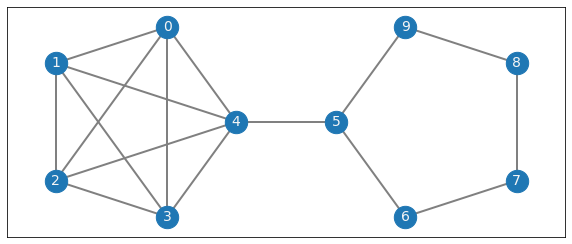

In [ ]:
# plot_dumbbell(b=b_global, num_middle_node=num_middle_node_global, dumbbell_type=dumbbell_type_global)
plot_dumbbell()

In [ ]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# import matplotlib.pyplot as plt
# %matplotlib inline

# import numpy as np

widget_plot_dumbbell=interactive(plot_dumbbell, b = widgets.IntSlider(value=4, min=3, max=15, step=1),
         num_middle_node=widgets.IntSlider(value=0, min=-1, max=5, step=1, description='number of node in-between'), 
         dumbbell_type=widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')],
                                                value='normal',
                                                description='dumbell type'))
display(widget_plot_dumbbell)

interactive(children=(IntSlider(value=4, description='b', max=15, min=3), IntSlider(value=0, description='numb…

In [ ]:
# def initialize_variables(g, cd_min):
def initialize_variables(g, cd_min):  # keep initialize_variables to be used separately
    # g can be obtained by g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)


    cd_solutions = {}  # cd means cardinality
    cd_criticals_sp = {}
    
    def total_internal_edges(g, nbunch):
        """nbunch: frosenset, set or list"""
        return sum([w for _,_,w in list(g.subgraph(nbunch).edges.data('weight'))])
    
    if cd_min >= 0:
        cd_min_set = set(itertools.combinations(g.nodes(), cd_min))
        community_1_intercept = max([total_internal_edges(g, c) for c in cd_min_set])
        community_1_set = {frozenset(c) for c in cd_min_set if total_internal_edges(g, c)==community_1_intercept}
        cd_solutions[cd_min] = cd_solutions.get(cd_min, set()).union(community_1_set)

    cd_solutions[len(g.nodes())] = {frozenset(g.nodes)}
    cd_criticals_sp[len(g.nodes())] = 0

    
    
    ## for each cardinality, find the best sets
    def find_candidate_for_cd(g):
        cd_intercept_dict = {}
        cd_candidate_community_dict = {}
        for cd in range(cd_min, len(g.nodes())+1):
            temp_intercept = -np.inf
            for c in set(itertools.combinations(g.nodes(), cd)):
                c_intercept =  total_internal_edges(g, c)
                if c_intercept > temp_intercept:
                    cd_candidate_community_dict.setdefault(cd, set()).clear()
                    temp_intercept = c_intercept
                    cd_intercept_dict[cd] = c_intercept
                    cd_candidate_community_dict.setdefault(cd, set()).add(frozenset(c))
                if c_intercept == temp_intercept:
                    cd_candidate_community_dict.setdefault(cd, set()).add(frozenset(c))
        return cd_intercept_dict, cd_candidate_community_dict
    cd_intercept_dict, cd_candidate_community_dict = find_candidate_for_cd(g)    


    f_sp = {}     ## the functions for the candidates sets of each cardinality
    # cd_y_intercept_sp = {}
    for cd in range(cd_min, len(g.nodes())+1):
        f_sp.setdefault(cd, - cd * x + cd_intercept_dict[cd])
    # f_sp

    info_plot = {} ## store the information for plotting
    # new_run = True

    community_1 = list(cd_solutions[cd_min])[0]
    community_2 = list(cd_solutions[len(g.nodes())])[0]    
    
    return cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, community_1, community_2

# cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, community_1, community_2 = initialize_variables(g)

In [ ]:
# print(cd_intercept_dict)
# cd_candidate_community_dict
# cd_candidate_community_list = sorted(list(cd_candidate_community_dict.items()), reverse=True)

In [ ]:
# print(cd_candidate_community_list)

In [ ]:
# print(cd_intercept_dict)

In [ ]:
# def find_critical(g, community_1=community_1, community_2=community_2, 
#                   cd_solutions = cd_solutions, cd_criticals_sp=cd_criticals_sp, new_run_reset = True):
def find_critical(g=None, cd_min=cd_min):
    # be careful when passing a list or a set to arguments
    # global new_run, info_plot
    # if new_run == True:
    #     info_plot = {}

    if g==None:
        raise Exception('g should be provided and can be obtained by g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)')

    
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, community_1, community_2 = initialize_variables(g, cd_min)
    
    # def _find_critical(g, community_1=None, community_2=None, cd_solutions=None, cd_criticals_sp=None, 
    #                    f_sp=None, info_plot=None,cd_intercept_dict=None, cd_candidate_community_dict=None):
    def _find_critical(g, community_1=None, community_2=None):
        # community_1 = list(cd_solutions[cd_min])[0]
        # community_2 = list(cd_solutions[len(g.nodes())])[0]

        # global info_plot
        # print(info_plot)

        current_call_index = len(info_plot)
        info_plot[current_call_index] = {0:[community_1,community_2]}

        cd1 = len(community_1)
        cd2 = len(community_2)

        # f_sp[cd1] = - cd1 * x + total_internal_edges(g, community_1)
        # f_sp[cd2] = - cd2 * x + total_internal_edges(g, community_2)

        cross_sp = sp.linsolve([f_sp[cd1] - y, f_sp[cd2] - y], (x, y))
        cross_x_sp, cross_y_sp = list(list(cross_sp)[0])
        # print(cd1, cd2, cross_x_sp)

        info_plot[current_call_index][1] = [cross_x_sp, cross_y_sp]

        temp_best_cd = cd1
        temp_non_minimal_cd_set = set()
        temp_best_y_sp = cross_y_sp
        for cd in range(cd2-1, cd1-1, -1):  # from large cardinality to small cardinality
            cd_y_sp = f_sp[cd].subs(x, cross_x_sp)
            # cd1 should be computed, otherwise will cause additional non-usefull recursion when multiple line intersect together. then should be careful not to introduce solutions for cd1 into non minimal solution set
            if cd_y_sp == temp_best_y_sp: # 
                temp_best_y_sp = cd_y_sp
                temp_best_cd = cd
                if cd != cd1:
                    temp_non_minimal_cd_set.add(cd)

            if cd_y_sp > temp_best_y_sp:
                temp_best_y_sp = cd_y_sp
                temp_best_cd = cd
                temp_non_minimal_cd_set.clear()
                # print(len(info_plot),cd, cd_y_sp, temp_best_y_sp)

        info_plot[current_call_index][2] = [False, False] # first len(temp_non_minimal_cd_set)==0, second for temp_best==cd1 
        info_plot[current_call_index][3] = [set(), set()]

        if len(temp_non_minimal_cd_set)!=0:
            for temp_cd in temp_non_minimal_cd_set:
                cd_solutions[temp_cd]=cd_solutions.setdefault(temp_cd, set()).union(cd_candidate_community_dict[temp_cd])

            info_plot[current_call_index][2][0] = True
            info_plot[current_call_index][3][0] = temp_non_minimal_cd_set

        if temp_best_cd == cd1:
            cd_solutions[cd1]=cd_solutions.setdefault(cd1, set()).union(cd_candidate_community_dict[cd1])
            cd_criticals_sp[cd1] = cross_x_sp
            # print(cross_x_sp,cd_criticals_sp)

            info_plot[current_call_index][2][1] = True        
            return
        else:
            cd_solutions[temp_best_cd]=cd_solutions.setdefault(temp_best_cd, set()).union(cd_candidate_community_dict[temp_best_cd])

            info_plot[current_call_index][2][1] = False
            info_plot[current_call_index][3][1] = temp_best_cd           

            # print(temp_best_cd, cd_solutions)
            community = list(cd_solutions[temp_best_cd])[0]
            # print('temp_best_cd', temp_best_cd, community)
            _find_critical(g, community_1, community)
            _find_critical(g, community, community_2)    
    
    
    # _find_critical(g, community_1=community_1, community_2=community_2, 
    #               cd_solutions = cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict)

    # if new_run_reset == True:
    #     new_run = True
    # return cd_solutions, cd_criticals_sp, info_plot    
    
    _find_critical(g, community_1=community_1, community_2=community_2)
    return cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict

In [ ]:
g = create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

In [ ]:
cd_solutions

{1: {frozenset({9}),
  frozenset({1}),
  frozenset({5}),
  frozenset({4}),
  frozenset({2}),
  frozenset({8}),
  frozenset({7}),
  frozenset({3}),
  frozenset({6}),
  frozenset({0})},
 10: {frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})},
 5: {frozenset({0, 1, 2, 3, 4})}}

In [ ]:
cd_criticals_sp

{10: 0, 1: 5/2, 5: 6/5}

In [ ]:
cd_criticals_sp_list = sorted(list(cd_criticals_sp.items()))
print(cd_criticals_sp_list)

[(1, 5/2), (5, 6/5), (10, 0)]


In [ ]:
# info_plot

In [ ]:
## Solve the autowrapping problem in jupyter notebook by using ax.add_artist()
## https://stackoverflow.com/a/56552098
# import matplotlib.pyplot as plt
# import matplotlib.text as mtext

class WrapText(mtext.Text):
    def __init__(self,
                 x=0, y=0, text='',
                 width=0,
                 **kwargs):
        mtext.Text.__init__(self,
                 x=x, y=y, text=text,
                 wrap=True,
                 **kwargs)
        self.width = width  # in screen pixels. You could do scaling first

    def _get_wrap_line_width(self):
        return self.width

# fig = plt.figure(1, clear=True)
# ax = fig.add_subplot(111)

# text = ('Lorem ipsum dolor sit amet, consectetur adipiscing elit, '
#         'sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. ')

# # Create artist object. Note clip_on is True by default
# # The axes doesn't have this method, so the object is created separately
# # and added afterwards.
# wtxt = WrapText(.8, .4, text, width=200, va='top', clip_on=False,
#                 bbox=dict(boxstyle='square', fc='w', ec='b'))
# # Add artist to the axes
# ax.add_artist(wtxt)

# plt.show()

In [ ]:
# %matplotlib inline
# from IPython.display import display, clear_output, Latex

# import numpy as np
# import matplotlib.pyplot as plt 
# import matplotlib as mpl
# import time
class CusPlotSetting:    
    cmap_basic = mpl.colors.ListedColormap(['orangered','blue', 'purple', 'green','red','magenta', 'blueviolet','yellowgreen', 'deeppink', 'cyan'])
    cmap = mpl.colors.ListedColormap(cmap_basic.colors * max(100, (len(g.nodes())//len(cmap_basic.colors)+1)))  ## this is based on b, better not to use
    # cmap = plt.get_cmap('Paired')

    # def _plot_step(ax, x, y, **kwargs):
    #     ax.plot(x, y, **kwargs)
    #     # plt.show()
    #     return ax

    figsize_x=16
    figsize_y=12
    font_size = 12

    fig_aspect=0.5
    fig_xlim_left=0
    fig_xlim_right=8
    fig_ylim_bottom=-18
    fig_ylim_top=13

    text_x_pos = 3.5
    linewidth_1 = 0.3
    linewidth_2 = 3
    scatter_size_1 = 10
    scatter_size_2 = 80

    zorder_1 = len(info_plot)
    zorder_2 = 10*len(info_plot)

    d_offset = abs(f_sp[cd_min].evalf(subs={x:max(cd_criticals_sp.values())})) #offset for text position based on the distance from first critical point to x axis

    xx_right=8
# xx=np.linspace(0,xx_right)

def plot_steps(step_pause = len(info_plot)*4, 
               g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=CusPlotSetting.text_x_pos, linewidth_1 = CusPlotSetting.linewidth_1, 
                   linewidth_2 = CusPlotSetting.linewidth_2, scatter_size_1 = CusPlotSetting.scatter_size_1, scatter_size_2 = CusPlotSetting.scatter_size_2, 
                   zorder_1=CusPlotSetting.zorder_1,zorder_2=CusPlotSetting.zorder_2, d_offset=CusPlotSetting.d_offset,
                   figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect,
                   fig_xlim_left=CusPlotSetting.fig_xlim_left, fig_xlim_right=CusPlotSetting.fig_xlim_right, 
                   fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, 
                   xx_right=CusPlotSetting.xx_right, cmap_basic=CusPlotSetting.cmap_basic):
    ## ipython interact widget can't accept function with arguments with type tuple.
    
    cmap = mpl.colors.ListedColormap(cmap_basic.colors * (len(g.nodes())//len(cmap_basic.colors)+2))
    
    xx=np.linspace(0, xx_right)
    fig = plt.figure(figsize=(figsize_x, figsize_y))

    ax = fig.add_subplot(121)
    plt.rc('font', size=font_size) 

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data',0))

    ax.set_aspect(fig_aspect)
    ax.set_xlim(fig_xlim_left, fig_xlim_right)
    ax.set_ylim(fig_ylim_bottom, fig_ylim_top)
    ax.xaxis.get_major_ticks()[0].label1.set_visible(False)  # https://stackoverflow.com/a/13583251
    
    
    ax2 = fig.add_subplot(122)
    pos=g.nodes('pos')
    nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500, ax=ax2)
    nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke',ax=ax2)
    nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2, ax=ax2)
    ax2.set_aspect(1)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    print('If there are multiple solutions, a random solution is indicated on the right hand side. Additionally, non-minimal solutions are not shown by text.')
    
    
    step_current = 0

    for big_step in range(0, len(info_plot)):
        info = info_plot[big_step]
        cd1, cd2 = len(info[0][0]), len(info[0][1])
        yy1 = - cd1 * xx + cd_intercept_dict[cd1]
        yy2 = - cd2 * xx + cd_intercept_dict[cd2]
        
        
        if step_pause==0: break ## 


        f2_str = 'y='+str(f_sp[cd2])
        ax.plot(xx, yy2, label=f2_str, color=cmap.colors[cd2], linewidth=linewidth_1)
        ax.text(text_x_pos, f_sp[cd2].evalf(subs={x:text_x_pos}) +0.1, f2_str, color=cmap.colors[cd2])

        f1_str = 'y='+str(f_sp[cd1])
        ax.plot(xx, yy1, label='y='+str(f_sp[cd1]), color=cmap.colors[cd1], linewidth=linewidth_1)
        ax.text(text_x_pos, f_sp[cd1].evalf(subs={x:text_x_pos}) +0.1, f1_str, color=cmap.colors[cd1])
        # kwargs = {'label':'f(x)='+str(f_sp[cd1])}
        # ax = _plot_step(ax, xx, yy1, **kwargs)
        # plt.show()
        # time.sleep(2)
        
        step_current += 1
        if step_current >= step_pause: break

        ax.scatter(*info[1], s=scatter_size_1, c=cmap.colors[cd1])
        
        step_current += 1
        if step_current >= step_pause: break

        
        if info[2][0] == True:
            for cdprime in info[3][0]:
                yyprime = - cdprime * xx + cd_intercept_dict[cdprime]
                ax.plot(xx, yyprime, label='y='+str(f_sp[cdprime]), color=cmap.colors[cdprime], linewidth=linewidth_1)
                # if wanted, can add text for the solutions.
        
            step_current += 1
            if step_current >= step_pause: break


        if info[2][1] == True:
            ax.scatter(*info[1], s=scatter_size_2, c=cmap.colors[cd1], zorder=zorder_2)
            

        
            step_current += 1
            if step_current >= step_pause: break


            
            # if d_offset==None: This is restricted to recursion from small community to large community
            #     d_offset = (0 if info[1][1]>0 else - info[1][1])
            #     # print(d_offset)
            point_text = [info[1][0],  info[1][1] + d_offset + 3]
            ax.plot([info[1][0], point_text[0]], [info[1][1], point_text[1]], color=cmap.colors[cd1], ls='dashed', linewidth=linewidth_2)

            cd1_solution_text = ', '.join(str(set(s)) for s in cd_solutions[cd1]) if cd1!=0 else str(r'$\emptyset$')
            text = str('x=') + str(info[1][0]) + str(': ') + str(cd1_solution_text)
            wtxt = WrapText(point_text[0]+0.3,point_text[1], text, color=cmap.colors[cd1], width=200, va='top', clip_on=True,
                    bbox=dict(boxstyle='square', fc='w', ec=cmap.colors[cd1], lw=0))
            ax.add_artist(wtxt)

            if big_step > 0:
                if cd1 != len(info_plot[big_step-1][0][0]):
                    cross_x_cd1_with_last_cd1 = float(list(list(
                        sp.linsolve([f_sp[cd1] - y, f_sp[len(info_plot[big_step-1][0][0])] - y], (x,y)))[0])[0])
                else:
                    cross_x_cd1_with_last_cd1 = np.inf
            if big_step == 0:
                cross_x_cd1_with_last_cd1 = np.inf
            # here can be better, want to decide the boundary for current cd1 curve to be a solution, and 
            # currently in the recursion, we always calculate from smaller community_1, hence can take it from 
            # the interception of community_1 with that in last call of the recursion.
            # if the community_1 in the last call is the most smallest cardinality, current community_1 will be the same, so can't get an intersection soution

            xx_cd1=np.linspace(float(info[1][0]), min(max(xx), cross_x_cd1_with_last_cd1))
            yy_cd1=- cd1 * xx_cd1 + cd_intercept_dict[cd1]
            ax.plot(xx_cd1, yy_cd1, color=cmap.colors[cd1], linewidth=linewidth_2)
            
            
            nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500, ax=ax2)
            nx.draw_networkx_nodes(list(cd_solutions[cd1])[0], pos=g.nodes(data='pos'), node_color=cmap.colors[cd1], node_size=500, ax=ax2)
            
            nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke',ax=ax2)
            nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2, ax=ax2)
            # ax2.add_text(0.5*ax2.bbox.width, 0.2*ax2.bbox.height, str('If there are multiple solutions, a random solution is indicated on the right hand side.'), color=cmap.colors[cd1])

            
            
            

            if cd2 == len(info_plot[0][0][1]): # the end must be the one related with the line for V
                
                step_current += 1
                if step_current >= step_pause: break
                
                xx_cd2=np.linspace(0, float(info[1][0]))
                yy_cd2=- cd2 * xx_cd2 + cd_intercept_dict[cd2]
                ax.plot(xx_cd2, yy_cd2, color=cmap.colors[cd2], linewidth=linewidth_2)
                ax.text(0+0.5, cd_intercept_dict[cd2] -0.25*cd2, str(set(list(cd_solutions[cd2])[0])), color=cmap.colors[cd2])              
            
                nx.draw_networkx_nodes(g, pos=g.nodes(data='pos'), node_color='tab:blue', node_size=500, ax=ax2)
                nx.draw_networkx_nodes(list(cd_solutions[cd2])[0], pos=g.nodes(data='pos'), node_color=cmap.colors[cd2], node_size=500, ax=ax2)
                nx.draw_networkx_labels(g, pos=g.nodes(data='pos'), font_size=14, font_color='whitesmoke',ax=ax2)
                nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2, ax=ax2)
                


    # ax2 = fig.add_subplot(122)
    # ax2.axis([0,10,0,10])
    # ax2_str = str(cd_criticals_sp_list) + str(cd_solutions)
    # ## https://stackoverflow.com/a/15740730
    # from textwrap import wrap
    # # ax2_str_wrapped = [ '\n'.join(wrap(l, 20)) for l in ax2_str ]
    # # ax2_text = ax2.text(2, 10, ax2_str, color=cmap.colors[cd2], ha='left', wrap=True )    
    # # ## https://stackoverflow.com/a/56552098
    # # ax2_text._get_wrap_line_width = lambda : 600.
    # ax2.spines['right'].set_visible(False)
    # ax2.spines['top'].set_visible(False)
    # ax2.spines['bottom'].set_visible(False)
    # ax2.spines['left'].set_visible(False)
    # ax2.set_xticks([])
    # ax2.set_yticks([])

    # for i, slope in enumerate(slope_list):
    #     slope_in_label = '' if slope_list[i] == 1 else str(slope_list[i])
    #     if intercept_list[i]>0:
    #         intercept_in_label = ' + ' + str(intercept_list[i])
    #     elif intercept_list[i]<0:
    #         intercept_in_label = ' - ' + str(-intercept_list[i])
    #     else:
    #         intercept_in_label = ''
    #     locals()['y_'+str(slope)] = slope_in_label + 'x' + intercept_in_label
    #     y=slope * x + intercept_list[i]
    #     plt.plot(x, y, label='y=' + locals()['y_'+str(slope)])
    # plt.legend()
    plt.show()

In [ ]:
def total_steps_by_info_plot(info_plot=None): # should according to plot_steps()
    if info_plot==None:
        raise Exception('The variable info_plot is None!')
    steps_total=0
    for big_step in range(0, len(info_plot)):
        steps_total += info_plot[big_step][2][0] + info_plot[big_step][2][1]
    steps_total += 2*len(info_plot)+1+1
    return steps_total
# but interact widget do not when info_plot changed due to the change of b, this value can't be updated automaticly. Hence should need another widget to help, or create a global variable or store in a class.

In [ ]:
def plot_steps_with_important_parameter(step_pause, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):
    plot_steps(step_pause, text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

widget_plot_steps_with_important_parameter = interactive(plot_steps_with_important_parameter, step_pause=widgets.IntSlider(value=3, min=0, max=len(info_plot)*4, step=1, description='Steps'))
controls = HBox(widget_plot_steps_with_important_parameter.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget_plot_steps_with_important_parameter.children[-1]
display(VBox([controls, output]))

In [ ]:
def plot_steps_with_b(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):
    g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
# widget_plot_steps_with_b = interactive(plot_steps_with_b, b=widgets.IntSlider(value=4, min=3, max=8, step=1, description='b'),
#                                        num_middle_node=widgets.IntSlider(value=0, min=-1, max=6, step=1, description='Node in-between'), 
#                                        dumbbell_type=widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')],
#                                                 value='normal',
#                                                 description='dumbell type'),
#                                        cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
#                                        step_pause=widgets.IntSlider(value=3, min=0, max=12*b, step=1, description='Steps'))
# controls = HBox(widget_plot_steps_with_b.children[:-1], layout = Layout(flex_flow='row wrap'))
# output = widget_plot_steps_with_b.children[-1]
# display(VBox([controls, output]))

In [ ]:
# widget_b = widgets.IntSlider(value=4, min=3, max=8, step=1, description='b')
# widget_num_middle_node = widgets.IntSlider(value=0, min=-1, max=6, step=1, description='Node in-between')
# widget_cd_min = widgets.IntSlider(value=1, min=0, max=5, step=1, description='k')
# widget_dumbbell_type = widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')], value='normal', description='dumbell type')
# widget_step_pause = widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')) # default max depends on the other default value

# def update_widget_step_pause(*args):
#     _, _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_num_middle_node.value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
#     widget_step_pause.max = total_steps_by_info_plot(info_plot=info_plot)

# widget_b.observe(update_widget_step_pause, 'value')
# widget_num_middle_node.observe(update_widget_step_pause, 'value')
# widget_cd_min.observe(update_widget_step_pause, 'value')
# widget_dumbbell_type.observe(update_widget_step_pause, 'value')



widget_plot_steps_with_b = interactive(plot_steps_with_b, b=widgets.IntSlider(value=4, min=3, max=8, step=1, description='b'),
                                       num_middle_node=widgets.IntSlider(value=0, min=-1, max=6, step=1, description='Node in-between', style={'description_width': 'initial'}), 
                                       dumbbell_type=widgets.Dropdown(options=[('normal','normal'),('biased', 'biased'),('broken', 'broken')], value='normal', description='dumbell type'),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                       step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))
# output_observe = widgets.Output()
def update_widget_plot_steps_with_b(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_plot_steps_with_b.children[0].value, num_middle_node=widget_plot_steps_with_b.children[1].value, 
                                                             dumbbell_type=widget_plot_steps_with_b.children[2].value), widget_plot_steps_with_b.children[3].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_b.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_b.children[4].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_b.children[1].observe(update_widget_plot_steps_with_b, 'value')

for child in widget_plot_steps_with_b.children[0:4]:
    child.observe(update_widget_plot_steps_with_b, 'value')


widget_plot_steps_with_b_controls = HBox(widget_plot_steps_with_b.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_b_output = widget_plot_steps_with_b.children[-1]
# display(VBox([widget_plot_steps_with_b_controls, widget_plot_steps_with_b_output]))

In [ ]:
display(VBox([widget_plot_steps_with_b_controls, widget_plot_steps_with_b_output]))
# display(output_observe)

In [ ]:
# g= create_dumbbell(b=4, num_middle_node=2, dumbbell_type='normal')
# cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g,1)
# print(cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict, sep='\n\n')

In [ ]:
# g.edges(data=True)

In [ ]:
# info_plot

In [ ]:
widget_plot_steps_with_b.children[0:4]

(IntSlider(value=4, description='b', max=8, min=3),
 IntSlider(value=0, description='Node in-between', max=6, min=-1, style=SliderStyle(description_width='initial')),
 Dropdown(description='dumbell type', options=(('normal', 'normal'), ('biased', 'biased'), ('broken', 'broken')), value='normal'),
 IntSlider(value=1, description='k', max=5))

In [ ]:
widget_plot_steps_with_b.children[1].value

0

In [ ]:
_, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type))

In [ ]:
i = {0: {0: [frozenset({2}), frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14})], 1: [3/2, -3/2], 2: [False, False], 3: [set(), 5]}, 1: {0: [frozenset({2}), frozenset({0, 1, 2, 3, 4})], 1: [5/2, -5/2], 2: [False, True], 3: [set(), set()]}, 2: {0: [frozenset({0, 1, 2, 3, 4}), frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14})], 1: [11/10, 9/2], 2: [False, True], 3: [set(), set()]}}

In [ ]:
total_steps_by_info_plot(i)

10

In [ ]:
def create_overlapping(s_1, e_1, s_2, e_2, e_del=None, pos_seed=1):
    '''
    s1 e1: the start and end index for the first clique;
    s2 e2: the start and end index for the second clique;
    the index between s1 and e2 are the overlapping nodes.
    e_del: the list/tuple/set of edges that to be deleted, i.e., e_del=[(0,1),(1,2)], if d_del is provided as str, it will be coverted.
    '''
    e_list = []
    for i in range(s_1, e_1+1):
        for j in range(i+1,e_1+1):
            e_list.append((i, j, dict(weight = 1)))
    for i in range(s_2, e_2+1):
        for j in range(i+1, e_2+1):
            if j>=max(e_1+1,i+1):
                e_list.append((i, j, dict(weight = 1)))
    G = nx.Graph()
    G.add_edges_from(e_list)
    
    def str_tuple_to_int_tuple(s_t): # coverting e_del to list of tuples of integers/index of edges if e_del is str
        i_t = tuple(map(int, s_t.replace('(','').replace(')','').replace('[','').replace(']','').split(',')))
        return i_t
        
    if e_del != None and e_del != '': # ipywideget will give '' by default instead of None
        if type(e_del == str):
            e_del = list(map(str_tuple_to_int_tuple, e_del.replace(' ','').split('),(')))
        G.remove_edges_from(tuple(e_del))
    
    # G.remove_edges_from(([0,1],[2,3]))
    
    pos = nx.spring_layout(G, seed=pos_seed)
    n_pos_dict = pos
    for i, j in n_pos_dict.items():
        G.nodes[i]['pos'] = j
    return G

def plot_overlapping(s_1,e_1,s_2,e_2, pos_seed=1, *args):
    g=create_overlapping(s_1,e_1,s_2,e_2, pos_seed=pos_seed)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    nx.draw_networkx_edges(g, pos=g.nodes(data='pos'), edge_color='gray', width=2)
    ax.set_aspect(1)
    plt.show()
    return g

In [ ]:
def plot_steps_with_overlapping(s_1=0,e_1=4, s_2=3, e_2=7, e_del=None, pos_seed=1, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):
    # g=create_dumbbell(b=b, num_middle_node=num_middle_node, dumbbell_type=dumbbell_type)
    g=create_overlapping(s_1,e_1,s_2,e_2, e_del=e_del, pos_seed=pos_seed)
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
# plot_steps_with_overlapping()

In [ ]:
widget_plot_steps_with_overlapping = interactive(plot_steps_with_overlapping, s_1=widgets.IntSlider(value=0, min=0, max=1, step=1, description='start node of 1st subgraph'),
                                       e_1=widgets.IntSlider(value=4, min=1, max=12, step=1, description='end node of 1st subgraph', style={'description_width': 'initial'}), 
                                       s_2=widgets.IntSlider(value=3, min=1, max=8, step=1, description='start node of 2nd subgraph'),
                                       e_2=widgets.IntSlider(value=7, min=2, max=20, step=1, description='end node of 2nd subgraph', style={'description_width': 'initial'}), 
                                       e_del=widgets.Textarea(value='', placeholder='format: [(1,2),(3,4)]', description='edges to delete', disabled=False, layout=Layout(width='50%')),
                                       pos_seed=widgets.IntSlider(value=1, min=1, max=50, step=1, description='pos_seed', style={'description_width': 'initial'}),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                                 step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))
# output_observe = widgets.Output()
def update_widget_plot_steps_with_overlapping(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(create_overlapping(s_1=widget_plot_steps_with_overlapping.children[0].value, e_1=widget_plot_steps_with_overlapping.children[1].value, 
                                                             s_2=widget_plot_steps_with_overlapping.children[2].value, e_2=widget_plot_steps_with_overlapping.children[3].value), 
                                             widget_plot_steps_with_overlapping.children[6].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_overlapping.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_overlapping.children[7].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_overlapping.children[1].observe(update_widget_plot_steps_with_overlapping, 'value')

for child in widget_plot_steps_with_overlapping.children[0:4]:
    child.observe(update_widget_plot_steps_with_overlapping, 'value')


widget_plot_steps_with_overlapping_controls = HBox(widget_plot_steps_with_overlapping.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_overlapping_output = widget_plot_steps_with_overlapping.children[-1]

In [ ]:
display(VBox([widget_plot_steps_with_overlapping_controls, widget_plot_steps_with_overlapping_output]))

In [ ]:
# the following e cells use naive method for customized graph. can skip and use the more general one after 5 cells
print('the following e cells use naive method for customized graph. can skip and use the more general one with ipywidget after 5 cells')

the following e cells use naive method for customized graph. can skip and use the more general one with ipywidget after 5 cells


In [ ]:
cus_g = nx.Graph()
cus_g.add_edges_from([(0,1),
                      (1,2),
                      (2,3),
                     (0,2)])

for e in cus_g.edges():
    if not 'weight' in cus_g.edges[e]:
        cus_g.edges[e]['weight'] = 1

pos_seed = 0
pos = nx.spring_layout(cus_g, seed=pos_seed)
n_pos_dict = pos
for k, v in n_pos_dict.items():
    cus_g.nodes[k]['pos'] = v

In [ ]:
cus_g.nodes(data=True)
cus_g.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (1, 2, {'weight': 1}), (2, 3, {'weight': 1})])

In [ ]:
def plot_steps_with_cus_g(g=cus_g, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):

    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
widget_plot_steps_with_cus_g = interactive(plot_steps_with_cus_g, g=fixed(cus_g),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                                 step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))

# output_observe = widgets.Output()
def update_widget_plot_steps_with_cus_g(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(cus_g, widget_plot_steps_with_cus_g.children[0].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_overlapping.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_cus_g.children[1].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_overlapping.children[1].observe(update_widget_plot_steps_with_overlapping, 'value')

for child in widget_plot_steps_with_cus_g.children[0:0]:
    child.observe(update_widget_plot_steps_with_cus_g, 'value')


widget_plot_steps_with_cus_g_controls = HBox(widget_plot_steps_with_cus_g.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_cus_g_output = widget_plot_steps_with_cus_g.children[-1]

In [ ]:
display(VBox([widget_plot_steps_with_cus_g_controls, widget_plot_steps_with_cus_g_output]))

In [ ]:
def create_cus_g(e_add, e_weight_add=None, e_del=None):
    cus_g = nx.Graph()
    
    def str_tuple_to_int_tuple(s_t): # coverting e_del to list of tuples of integers/index of edges if e_del is str
        i_t = tuple(map(int, s_t.replace('(','').replace(')','').replace('[','').replace(']','').split(',')))
        return i_t
    
    if e_add != None and e_add != '': # ipywideget will give '' by default instead of None, and give str type when not ''
        if type(e_add) == str:
            e_add = list(map(str_tuple_to_int_tuple, e_add.replace(' ','').split('),(')))
        cus_g.add_edges_from(tuple(e_add))    
        
            
    for e in cus_g.edges():
        if not 'weight' in cus_g.edges[e]:
            cus_g.edges[e]['weight'] = 1
        
    if e_weight_add != None and e_weight_add != '' and type(e_weight_add)!=list: # ipywideget will give '' by default instead of None
        if type(e_weight_add) == str:
            e_weight_add = list(map(str_tuple_to_int_tuple, e_weight_add.replace(' ','').split('),(')))
        for i in range(len(e_weight_add)):
            e_current = tuple((e_weight_add[i][0], e_weight_add[i][1], {'weight':e_weight_add[i][2]}))
            if cus_g.has_edge(e_weight_add[i][0], e_weight_add[i][1]):
                cus_g.edges[e_weight_add[i][0], e_weight_add[i][1]]['weight'] = e_weight_add[i][2]
            else:
                cus_g.add_edges_from([e_current])
        #use add_weighted_edges_from is() easier
        
        
    if e_del != None and e_del != '' and type(e_del)!=list: # ipywideget will give '' by default instead of None
        if type(e_del) == str:
            e_del = list(map(str_tuple_to_int_tuple, e_del.replace(' ','').split('),(')))
        cus_g.remove_edges_from(tuple(e_del))


    pos_seed = 0
    pos = nx.spring_layout(cus_g, seed=pos_seed)
    n_pos_dict = pos
    for k, v in n_pos_dict.items():
        cus_g.nodes[k]['pos'] = v
        
    return cus_g

In [ ]:
def plot_steps_with_cus_g(e_add=None, e_weight_add=None, e_del=None, cd_min=cd_min, 
                      step_pause=3, text_x_pos=CusPlotSetting.text_x_pos,
                  figsize_x=CusPlotSetting.figsize_x, figsize_y=CusPlotSetting.figsize_y, font_size=CusPlotSetting.font_size, fig_aspect=CusPlotSetting.fig_aspect, 
                                        fig_xlim_right=CusPlotSetting.fig_xlim_right, fig_ylim_bottom=CusPlotSetting.fig_ylim_bottom, fig_ylim_top=CusPlotSetting.fig_ylim_top, xx_right=CusPlotSetting.xx_right):

    g=create_cus_g(e_add=e_add, e_weight_add=e_weight_add, e_del=e_del)
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

    plot_steps(step_pause=step_pause, g=g, cd_solutions=cd_solutions, cd_criticals_sp=cd_criticals_sp, f_sp=f_sp, info_plot=info_plot, cd_intercept_dict=cd_intercept_dict, cd_candidate_community_dict=cd_candidate_community_dict,
                   text_x_pos=text_x_pos,
                  figsize_x=figsize_x, figsize_y=figsize_y, font_size=font_size, fig_aspect=fig_aspect, 
                                        fig_xlim_right=fig_xlim_right, fig_ylim_bottom=fig_ylim_bottom, fig_ylim_top=fig_ylim_top, xx_right=xx_right)
    return 

In [ ]:
widget_plot_steps_with_cus_g = interactive(plot_steps_with_cus_g, 
                                           e_add=widgets.Textarea(value='[(0,1),(1,2),(0,2),(2,3)]', placeholder='format: [(1,2),(3,4)]', description='edges to add', disabled=False, layout=Layout(width='50%')),
                                           e_weight_add=widgets.Textarea(value='', placeholder='format: [(1,2,0.5),(3,4,2.5)], can be seen as passed to add_weighted_edges_from()', description='edges with weight', disabled=False, layout=Layout(width='50%')),
                                           e_del=widgets.Textarea(value='', placeholder='format: [(1,2),(3,4)]', description='edges to delete', disabled=False, layout=Layout(width='50%')),
                                       cd_min=widgets.IntSlider(value=1, min=0, max=5, step=1, description='k'),
                                                 step_pause=widgets.IntSlider(value=10, min=0, max=10, step=1, description='Steps', layout=Layout(width='50%')))

# output_observe = widgets.Output()
def update_widget_plot_steps_with_cus_g(*args):
    # with output_observe:
    #     print('observe take effect')
    _, _, _, info_plot, _, _ = find_critical(create_cus_g(e_add=widget_plot_steps_with_cus_g.children[0].value, e_weight_add=widget_plot_steps_with_cus_g.children[1].value, e_del=widget_plot_steps_with_cus_g.children[2].value), widget_plot_steps_with_cus_g.children[3].value)
    # _, _, _, info_plot, _, _ = find_critical(create_dumbbell(b=widget_b.value, num_middle_node=widget_plot_steps_with_overlapping.children[1].value, dumbbell_type=widget_dumbbell_type.value), widget_cd_min.value)
    # with output_observe:
    #     print(info_plot)
    #     print(total_steps_by_info_plot(info_plot=info_plot))
    widget_plot_steps_with_cus_g.children[4].max = total_steps_by_info_plot(info_plot=info_plot)    


# widget_plot_steps_with_overlapping.children[1].observe(update_widget_plot_steps_with_overlapping, 'value')

for child in widget_plot_steps_with_cus_g.children[0:3]:
    child.observe(update_widget_plot_steps_with_cus_g, 'value')


widget_plot_steps_with_cus_g_controls = HBox(widget_plot_steps_with_cus_g.children[:-1], layout = Layout(flex_flow='row wrap'))
widget_plot_steps_with_cus_g_output = widget_plot_steps_with_cus_g.children[-1]

In [ ]:
display(VBox([widget_plot_steps_with_cus_g_controls, widget_plot_steps_with_cus_g_output]))

In [ ]:
cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(g, cd_min)

In [ ]:
cd_solutions

{1: {frozenset({9}),
  frozenset({1}),
  frozenset({5}),
  frozenset({4}),
  frozenset({2}),
  frozenset({8}),
  frozenset({7}),
  frozenset({3}),
  frozenset({6}),
  frozenset({0})},
 10: {frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})},
 5: {frozenset({0, 1, 2, 3, 4})}}

In [ ]:
cd_criticals_sp

{10: 0, 1: 5/2, 5: 6/5}

In [ ]:
cus_g = create_cus_g([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(4,5),(4,6),(4,7),(5,6),(5,7),(6,7),(6,8),(8,9),(8,11),(9,10),(9,11),(10,11)])
print(cus_g.nodes)
threshold_str = input('The critical value for partitioning:')
if '/' in threshold_str:
    cus_s=sp.Rational(int(threshold_str.split('/')[0]),int(threshold_str.split('/')[1]))
else:
    cus_s=float(threshold_str)
solutions_at_cus_s = []
critical_sp_at_cus_s = []

cus_g_temp = cus_g.copy()
while len(cus_g_temp) !=0:  # NoneType when all nodes are removed
    cd_solutions, cd_criticals_sp, f_sp, info_plot, cd_intercept_dict, cd_candidate_community_dict = find_critical(cus_g_temp, cd_min)
    
    max_s = max(list(cd_criticals_sp.values()))
    
    for i, criticals_sp_i in  sorted(list(cd_criticals_sp.items()),reverse=True):
        if criticals_sp_i >= cus_s or criticals_sp_i == max_s:  # criticals_sp_i is the min value for sets in cd_solutions[i] to be maximal and have a strength>=criticals_sp_i
            critical_sp_at_cus_s.append(criticals_sp_i)
            solutions_at_cus_s.append(cd_solutions[i])
            print("turning point:", criticals_sp_i, ", clusters:", cd_solutions[i])
            
            cus_g_temp.remove_nodes_from(set().union(*[set(temp_set) for temp_set  in cd_solutions[i]]))

            break

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10]


The critical value for partitioning: 1


turning point: 3/2 , clusters: {frozenset({0, 1, 2, 3, 4, 5, 6, 7})}
turning point: 5/3 , clusters: {frozenset({11}), frozenset({9}), frozenset({8}), frozenset({10})}


In [ ]:
#attention: if g is a nx.Graph(), then g=g.remove_nodes_from()  will give NoneType, we shouldn't use such equation, we should only use g.remove_nodes_from() 

In [ ]:
threshold='5/3'
if '/' in threshold:
    sp.Rational(int(threshold.split('/')[0]),int(threshold.split('/')[1]))

In [ ]:
 # cd_solutions

In [ ]:
# cd_criticals_sp

In [ ]:
# sorted(list(cd_criticals_sp.items()),reverse=True)

In [ ]:
type(ag)

NameError: name 'ag' is not defined

In [ ]:


-----------------------------------------------EndEnd






-----------------------------------------------EndEnd






-----------------------------------------------EndEnd



In [ ]:
from IPython.display import display
import ipywidgets as widgets

int_range0_slider = widgets.IntSlider()
int_range1_slider = widgets.IntSlider()
output = widgets.Output()

def interactive_function(inp0,inp1):
    with output:
        print('ie changed. int_range0_slider: '+str(inp0)+' int_range1_slider: '+str(inp1))
    return

def report_int_range0_change(change):
    with output:
        print('int_range0 change observed'+str(change))
    return

def report_ie_change(change):
    with output:
        print('ie change observed'+str(change))
    return

ie = widgets.interactive(interactive_function, inp0=int_range0_slider,inp1=int_range1_slider)

# print(int_range0_slider.observe)
# print(ie.observe)
# int_range0_slider.observe(report_int_range0_change, names='value')
for child in ie.children:
    child.observe(report_ie_change)

display(int_range0_slider,int_range1_slider,output)

In [ ]:
widget_plot_steps_with_b.children[4].value

In [ ]:
# widget_plot_steps_with_b.children

In [ ]:
info_plot

In [ ]:
total_steps_by_info_plot(info_plot=info_plot)

In [ ]:
x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

In [ ]:
a= interactive(printer,x=x_widget, y=y_widget)
display(a)

In [ ]:
--------End------------------

In [ ]:
float(max(cd_criticals_sp.values()))

In [ ]:
sorted(list(cd_criticals_sp.items()))

In [ ]:
str(f_sp[2])

In [ ]:
sp.linsolve(0,1)

In [ ]:
xx=np.linspace(0,5)
f_sp[2].evalf(subs = {x:1})

In [ ]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(3,2))
ax=plt.axes([0.1, 0.1, 0.8, 0.7])
an1 = ax.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax.annotate("Test 2", xy=(0.5, 1.), xycoords=an1,
                  xytext=(0.5,1.1), textcoords=(an1, "axes fraction"),
                  va="bottom", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-"))
plt.show()

In [ ]:
f_sp[cd2].evalf(subs={x: 4})

In [ ]:
a=cd_criticals_sp[2].evalf()
print(type(a), a)

In [ ]:
a=[set(),set()]
a[1]= {123}

In [ ]:
a

In [ ]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

m = 10
n = 10
matrix = np.random.normal(0, 1, size=(m, n))

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(m):
    ax.clear()
    ax.plot(matrix[i, :])
    display(fig)
    clear_output(wait=True)
    plt.pause(0.2)

In [ ]:
# find_critical(g, list(cd_solutions[cd_min])[0], list(cd_solutions[len(g.nodes())])[0])

In [ ]:
Following are testing code ---------------------------------------

In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([(0, 1, {'weight': 3}), 
                   (1, 2, {'weight': 3}), 
                   (2, 3, {'weight': 1}),
                   (4, 5, {'weight': 4})                      
                   ])
G=DG

In [ ]:
solutions = [({1: frozenset({0}), 3: frozenset({0, 1, 2}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 3.0, 3: 2.0, 5: 1.0}, {1: 0, 3: -6, 5: -10}), ({1: frozenset({1}), 3: frozenset({0, 1, 2}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 3.0, 3: 2.0, 5: 1.0}, {1: 0, 3: -6, 5: -10}), ({1: frozenset({2}), 3: frozenset({0, 1, 2}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 3.0, 3: 2.0, 5: 1.0}, {1: 0, 3: -6, 5: -10}), ({1: frozenset({3}), 4: frozenset({0, 1, 2, 3})}, {1: 2.33333333, 4: 2.0}, {1: 0, 4: -7}), ({1: frozenset({4}), 2: frozenset({4, 5}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 4.0, 2: 2.0, 5: 1.0}, {1: 0, 2: -4, 5: -10}), ({1: frozenset({5}), 2: frozenset({4, 5}), 5: frozenset({0, 1, 2, 4, 5})}, {1: 4.0, 2: 2.0, 5: 1.0}, {1: 0, 2: -4, 5: -10})]

In [ ]:
L = ({6: {frozenset({0, 1, 2, 3, 4, 5})}, 1: {frozenset({3}), frozenset({2}), frozenset({1}), frozenset({5}), frozenset({4}), frozenset({0})}, 5: {frozenset({0, 1, 2, 4, 5})}, 2: {frozenset({4, 5})}}, {6: 0.0, 5: 1.0, 2: 2.0, 1: 4.0})

In [ ]:
def internal_degrees(nbunch):
    """nbunch: frosenset, set or list"""
    return sum([v for k,v in list(G.in_degree(nbunch, weight='weight'))])
    
internal_degrees(list((L[0][2]))[0])

In [ ]:
slope_list=sorted(L[0].keys())
x0_list=[L[1][k] for k in sorted(L[1].keys())]
intercept_list= [ - internal_degrees(list((L[0][slope]))[0]) for slope in slope_list]
print(slope_list, x0_list, intercept_list)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

cmap = mpl.colors.ListedColormap(['orange','blue', 'purple', 'green','red'])
cmap = mpl.colors.ListedColormap(cmap.colors * (max(slope_list)//len(cmap.colors)+1))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)


x=np.linspace(0,5)


for i, slope in enumerate(slope_list):
    slope_in_label = '' if slope_list[i] == 1 else str(slope_list[i])
    if intercept_list[i]>0:
        intercept_in_label = ' + ' + str(intercept_list[i])
    elif intercept_list[i]<0:
        intercept_in_label = ' - ' + str(-intercept_list[i])
    else:
        intercept_in_label = ''
    locals()['y_'+str(slope)] = slope_in_label + 'x' + intercept_in_label
    y=slope * x + intercept_list[i]
    plt.plot(x, y, label='y=' + locals()['y_'+str(slope)])


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))

ax.set_aspect(0.5)
plt.xlim((0, 6))
plt.ylim((-12, 5))
plt.legend()

In [ ]:
from IPython.display import clear_output
UG=G.to_undirected()

In [ ]:
# slope=5
# current_communities = list((L[0][slope]))
# # print(current_communities)

g=UG
def draw_current_communities(g, L, fig=None, current_communities=None, pos=None):
    if pos==None:
        pos=nx.spring_layout(g,seed=0)

    node_color_map = []
    for node in g:
        node_color_map.append('gray')

    if fig!=None:
        axarr=fig.add_subplot(1,1,1)

    # nx.draw(g,pos=pos, node_color=node_color_map, with_labels=True)
    nx.draw_networkx_nodes(g, pos=pos, node_color=node_color_map)
    nx.draw_networkx_labels(g, pos=pos, font_size=12, font_color='whitesmoke')
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edges(g, pos=pos, edge_color='tab:gray')
    nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=labels)

    if current_communities !=None:
        current_hsv = mpl.colors.rgb_to_hsv(mpl.colors.to_rgb(cmap.colors[slope]))
        current_rgb_list = []
        for i in range(0, len(current_communities)):
            c1=np.maximum(np.array([0,0,0]), np.multiply(current_hsv, (1-0.2,1-0.2,1-0.2)))
            c2=np.minimum(np.array([1,1,1]), np.multiply(current_hsv, (1+0.2,1+0.2,1+0.2)))
            current_rgb=tuple(mpl.colors.hsv_to_rgb(c1*(i+1)/len(current_communities) + c2*(1-(i+1)/len(current_communities))))
            current_rgb_list.append(current_rgb)                
            nx.draw_networkx_nodes(g, pos=pos, nodelist= current_communities[i],node_color=current_rgb_list[i])

    if fig!=None:
        return fig
    else:
        plt.show()

# draw_current_communities(g=UG, L=L, pos=None)

# fig=plt.figure(figsize=(8,8))
for slope in slope_list:
    current_communities=list((L[0][slope]))
    draw_current_communities(g=UG, L=L, fig=fig,current_communities=current_communities)
    plt.show()
    time.sleep(3)
    clear_output(wait=True)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


def draw_current_communities_by_widget(slope):
    current_communities=list((L[0][slope]))
    draw_current_communities(g=UG, L=L, fig=fig,current_communities=current_communities)
    plt.show()

interact(draw_current_communities_by_widget, slope = widgets.Dropdown(
    options=slope_list,
    value=max(slope_list)))

In [ ]:
--------------------------------------------

In [ ]:
x   = SR.var('x')
x0  = 0
f   = sin(x) * e^(-x)
p   = plot(f, -1, 5, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([1 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -1, 5, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-.5, ymax=1)

In [ ]:
from sage.repl.ipython_kernel.widgets import EvalText
w = EvalText(value="pi", transform=lambda x: x^2)
w
w.get_interact_value()

In [ ]:
npi = RDF(pi)
def rot(t):
    from math import cos, sin
    return matrix([[cos(t),sin(t)],[-sin(t),cos(t)]])

def pursuit(n,x0,y0,lamb,steps = 100, threshold = .01):
    paths = [[[x0,y0]]]
    for i in range(1,n):
        rx,ry = list(rot(2*npi*i/n)*vector([x0,y0]))
        paths.append([[rx,ry]])
    oldpath = [x[-1] for x in paths]
    for q in range(steps):
        diffs = [[oldpath[(j+1)%n][0]-oldpath[j][0],oldpath[(j+1)%n][1]-oldpath[j][1]] for j in range(n)]
        npath = [[oldpath[j][0]+lamb*diffs[j][0],oldpath[j][1]+lamb*diffs[j][1]] for j in range(n)]
        for j in range(n):
            paths[j].append(npath[j])
        oldpath = npath
    return paths
html('<h3>Curves of Pursuit</h3>')
@interact
def curves_of_pursuit(n = slider([2..20],default = 5, label="# of points"),steps = slider([floor(1.4^i) for i in range(2,18)],default = 10, label="# of steps"), stepsize = slider(srange(.01,1,.01),default = .2, label="stepsize"), colorize = selector(['BW','Line color', 'Filled'],default = 'BW')):
    outpaths = pursuit(n,0,1,stepsize, steps = steps)
    mcolor = (0,0,0)
    outer = line([q[0] for q in outpaths]+[outpaths[0][0]], rgbcolor = mcolor)
    polys = Graphics()
    if colorize=='Line color':
        colors = [hue(j/steps,1,1) for j in range(len(outpaths[0]))]
    elif colorize == 'BW':
        colors = [(0,0,0) for j in range(len(outpaths[0]))]
    else:
        colors = [hue(j/steps,1,1) for j in range(len(outpaths[0]))]
        polys = sum([polygon([outpaths[(i+1)%n][j+1],outpaths[(i+1)%n][j], outpaths[i][j+1]], rgbcolor = colors[j]) for i in range(n) for j in range(len(outpaths[0])-1)])
        #polys = polys[0]
        colors = [(0,0,0) for j in range(len(outpaths[0]))]
    nested = sum([line([q[j] for q in outpaths]+[outpaths[0][j]], rgbcolor = colors[j]) for j in range(len(outpaths[0]))])
    lpaths = [line(x, rgbcolor = mcolor) for x in outpaths]
    show(sum(lpaths)+nested+polys, axes = False, figsize = [5,5], xmin = -1, xmax = 1, ymin = -1, ymax =1)

In [ ]:
from sympy import *

Following are testing code

In [ ]:
---------------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import InteractiveGraph

g = G
edge_color = dict()
for ii, edge in enumerate(g.edges):
    edge_color[edge] = 'tab:gray' if ii%2 else 'tab:orange'

node_color = dict()
for node in g.nodes:
    node_color[node] = 'tab:red' if node%2 else 'tab:blue'

fig, ax = plt.subplots(figsize=(5, 5))

    
plot_instance = InteractiveGraph(
    g, node_size=5, node_color=node_color,
    node_labels=True, node_label_offset=0.1, node_label_fontdict=dict(size=20),
    edge_color=edge_color, edge_width=2,
    arrows=False, ax=ax)

plt.show()

In [ ]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [ ]:
# https://julialang.org/

In [ ]:
pip install webio_jupyter_extension 

In [ ]:
# https://github.com/tlienart/JSXGraph.jl/issues/2
# https://gist.github.com/terasakisatoshi/2543088fb4847014de812e942ac02fc7

In [ ]:
<!DOCTYPE html>
<html>

<head>
    <title>Type Script Greeter</title>
    <link rel="stylesheet" type="text/css" href="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraph.css" />
    <script type="text/javascript" src="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraphcore.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>

<body>
    <div id="board" class="jxgbox" style="width:500px; height:500px;"></div>
    <script type="text/javascript">
        JXG.Options.text.useMathJax = true;
        var board = JXG.JSXGraph.initBoard(
            "board",
            {
                boundingbox: [-15, 15, 15, -15],
                axis: true
            }
        );
        /* The slider neesd the following input parameters:
        [[x1, y1], [x2, y2], [min, start, max]]
        [x1, y1]: first point of the ruler
        [x2, y2]: last point of the ruler
        min: minimum value of the slider
        start: initial value of the slider
        max: maximum value of the slider
        */
        var a = board.create("slider", [[7, 7], [11, 7], [-3, 0.1, 10]], { name: "a" });
        var b = board.create("slider", [[7, 6], [11, 6], [-1, 1, 5]], { name: "b" });
        var c = board.create("slider", [[7, 5], [11, 5], [-10, -5, 2]], { name: "c" });
        // y = ax^2+bx+c
        var func = board.create(
            "functiongraph",
            [
                function (x) {
                    return a.Value() * x * x + b.Value() * x + c.Value();
                }
            ]
        )
        var quadratic = board.create(
            'text',
            [
                2,
                10,
                function () {
                    return '\\[f(x) = ax^2+bx+c\\]';
                }
            ],
            { fontSize: 20 }
        );
    </script>
</body>

</html>

In [ ]:
%%HTML

In [ ]:
from IPython.display import display, HTML
display(HTML(jtest))

In [ ]:
jtest = """
<html>

<head>
    <title>Type Script Greeter</title>
    <link rel="stylesheet" type="text/css" href="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraph.css" />
    <script type="text/javascript" src="http://jsxgraph.uni-bayreuth.de/distrib/jsxgraphcore.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>

<body>
    <div id="board" class="jxgbox" style="width:500px; height:500px;"></div>
    <script type="text/javascript">
        JXG.Options.text.useMathJax = true;
        var board = JXG.JSXGraph.initBoard(
            "board",
            {
                boundingbox: [-15, 15, 15, -15],
                axis: true
            }
        );
        /* The slider neesd the following input parameters:
        [[x1, y1], [x2, y2], [min, start, max]]
        [x1, y1]: first point of the ruler
        [x2, y2]: last point of the ruler
        min: minimum value of the slider
        start: initial value of the slider
        max: maximum value of the slider
        */
        var a = board.create("slider", [[7, 7], [11, 7], [-3, 0.1, 10]], { name: "a" });
        var b = board.create("slider", [[7, 6], [11, 6], [-1, 1, 5]], { name: "b" });
        var c = board.create("slider", [[7, 5], [11, 5], [-10, -5, 2]], { name: "c" });
        // y = ax^2+bx+c
        var func = board.create(
            "functiongraph",
            [
                function (x) {
                    return a.Value() * x * x + b.Value() * x + c.Value();
                }
            ]
        )
        var quadratic = board.create(
            'text',
            [
                2,
                10,
                function () {
                    return '\\[f(x) = ax^2+bx+c\\]';
                }
            ],
            { fontSize: 20 }
        );
    </script>
</body>

</html>
"""

In [ ]:
# https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output